In [1]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
annotation=doc['annotation']


In [2]:
tss_annotation = doc['tss_annotation']

In [3]:

import os
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
from Modules.Homer import *

print('Number of tissues: ',len(tissues))

('Number of tissues: ', 16)


In [4]:
rcParams['patch.facecolor'] = (0,0,0)

In [5]:
from collections import Counter

In [6]:
tss = pd.read_csv(tss_annotation,sep='\t',index_col=0)

In [7]:
peak_tissue_matrix = pd.read_csv('Results/merged/peaks_tissues.csv',index_col=0)

In [8]:
meta_samples = pd.read_csv('Results/meta_samples.csv',index_col=0)
meta_samples = meta_samples.set_index('Full')
meta_samples.head()


Experiment         Short  \
Full                                                                          
/data/isshamie/TSS/Processed/BMDMwt/GRO/f04_pea...        GRO    BMDMwt_GRO   
/data/isshamie/TSS/Processed/Brain/GRO/f04_peak...        GRO     Brain_GRO   
/data/isshamie/TSS/Processed/Brain/mSTART/f04_p...     mSTART  Brain_mSTART   
/data/isshamie/TSS/Processed/Heart/mSTART/f04_p...     mSTART  Heart_mSTART   
/data/isshamie/TSS/Processed/Kidney/GRO/f04_pea...        GRO    Kidney_GRO   

                                                   Short_with_number  Tissue  
Full                                                                          
/data/isshamie/TSS/Processed/BMDMwt/GRO/f04_pea...       BMDMwt_GRO1  BMDMwt  
/data/isshamie/TSS/Processed/Brain/GRO/f04_peak...        Brain_GRO1   Brain  
/data/isshamie/TSS/Processed/Brain/mSTART/f04_p...     Brain_mSTART1   Brain  
/data/isshamie/TSS/Processed/Heart/mSTART/f04_p...     Heart_mSTART1   Heart  
/data/isshamie/TSS/Processed/Kidney/GRO/f04_pea...       Kidney_GRO1  Kidney

In [9]:
txn_df = pickle.load(open('Results/txn_df.p','rb'))
gene_df = pickle.load(open('Results/gene_df.p','rb'))
gene_id_df = pickle.load(open('Results/gene_id_df.p','rb'))
gene_tissue_matrix = pd.read_csv('Results/merged/genes_tissues.csv',index_col = 0)

In [10]:
print('Percent of isoforms identified: ', 1.0*np.sum(txn_df['hasGene'])/txn_df.shape[0])
print('Percent of genes identified: ', 1.0*np.sum(gene_df['hasGene'])/gene_df.shape[0])

('Percent of isoforms identified: ', 0.33293879576953916)
('Percent of genes identified: ', 0.6700104372028296)


In [11]:
from cycler import cycler

In [12]:
sns.set_style("whitegrid", {'axes.grid' : False})

('Number of genes with greater than 10 peaks:', 13)
('Number of genes with greater than 10 peaks:', 1)
('Number of genes with greater than 10 peaks:', 0)


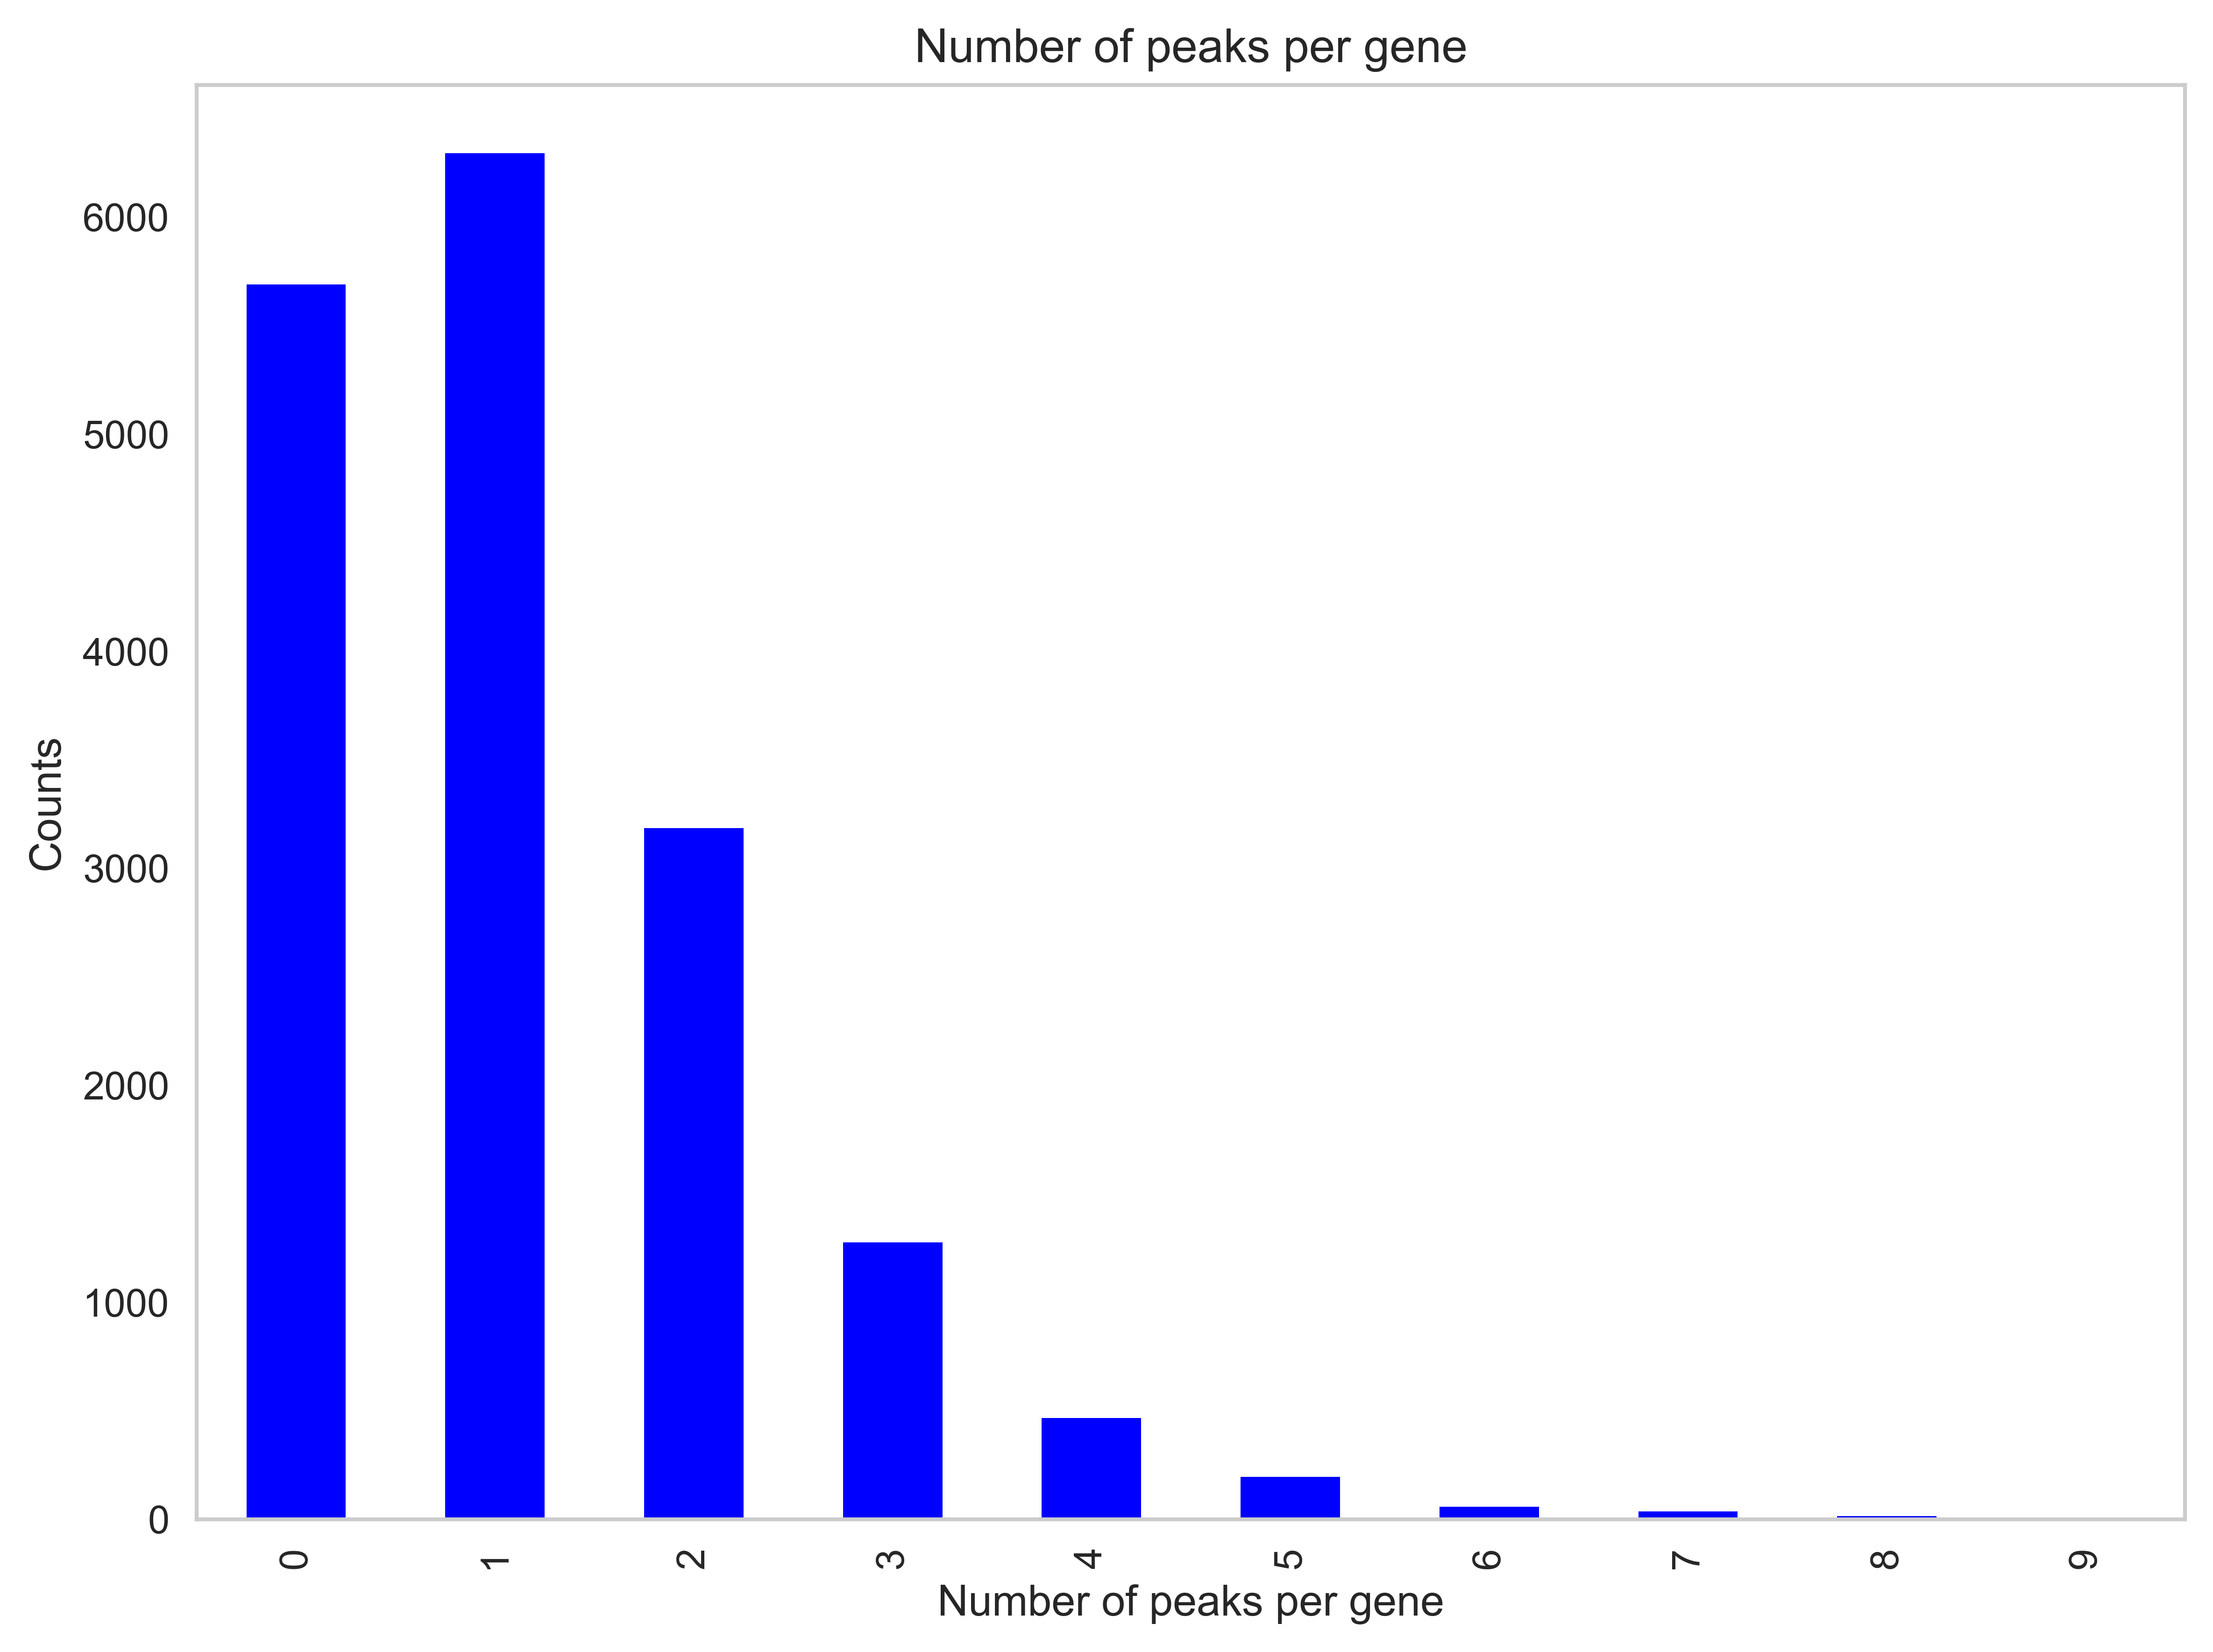

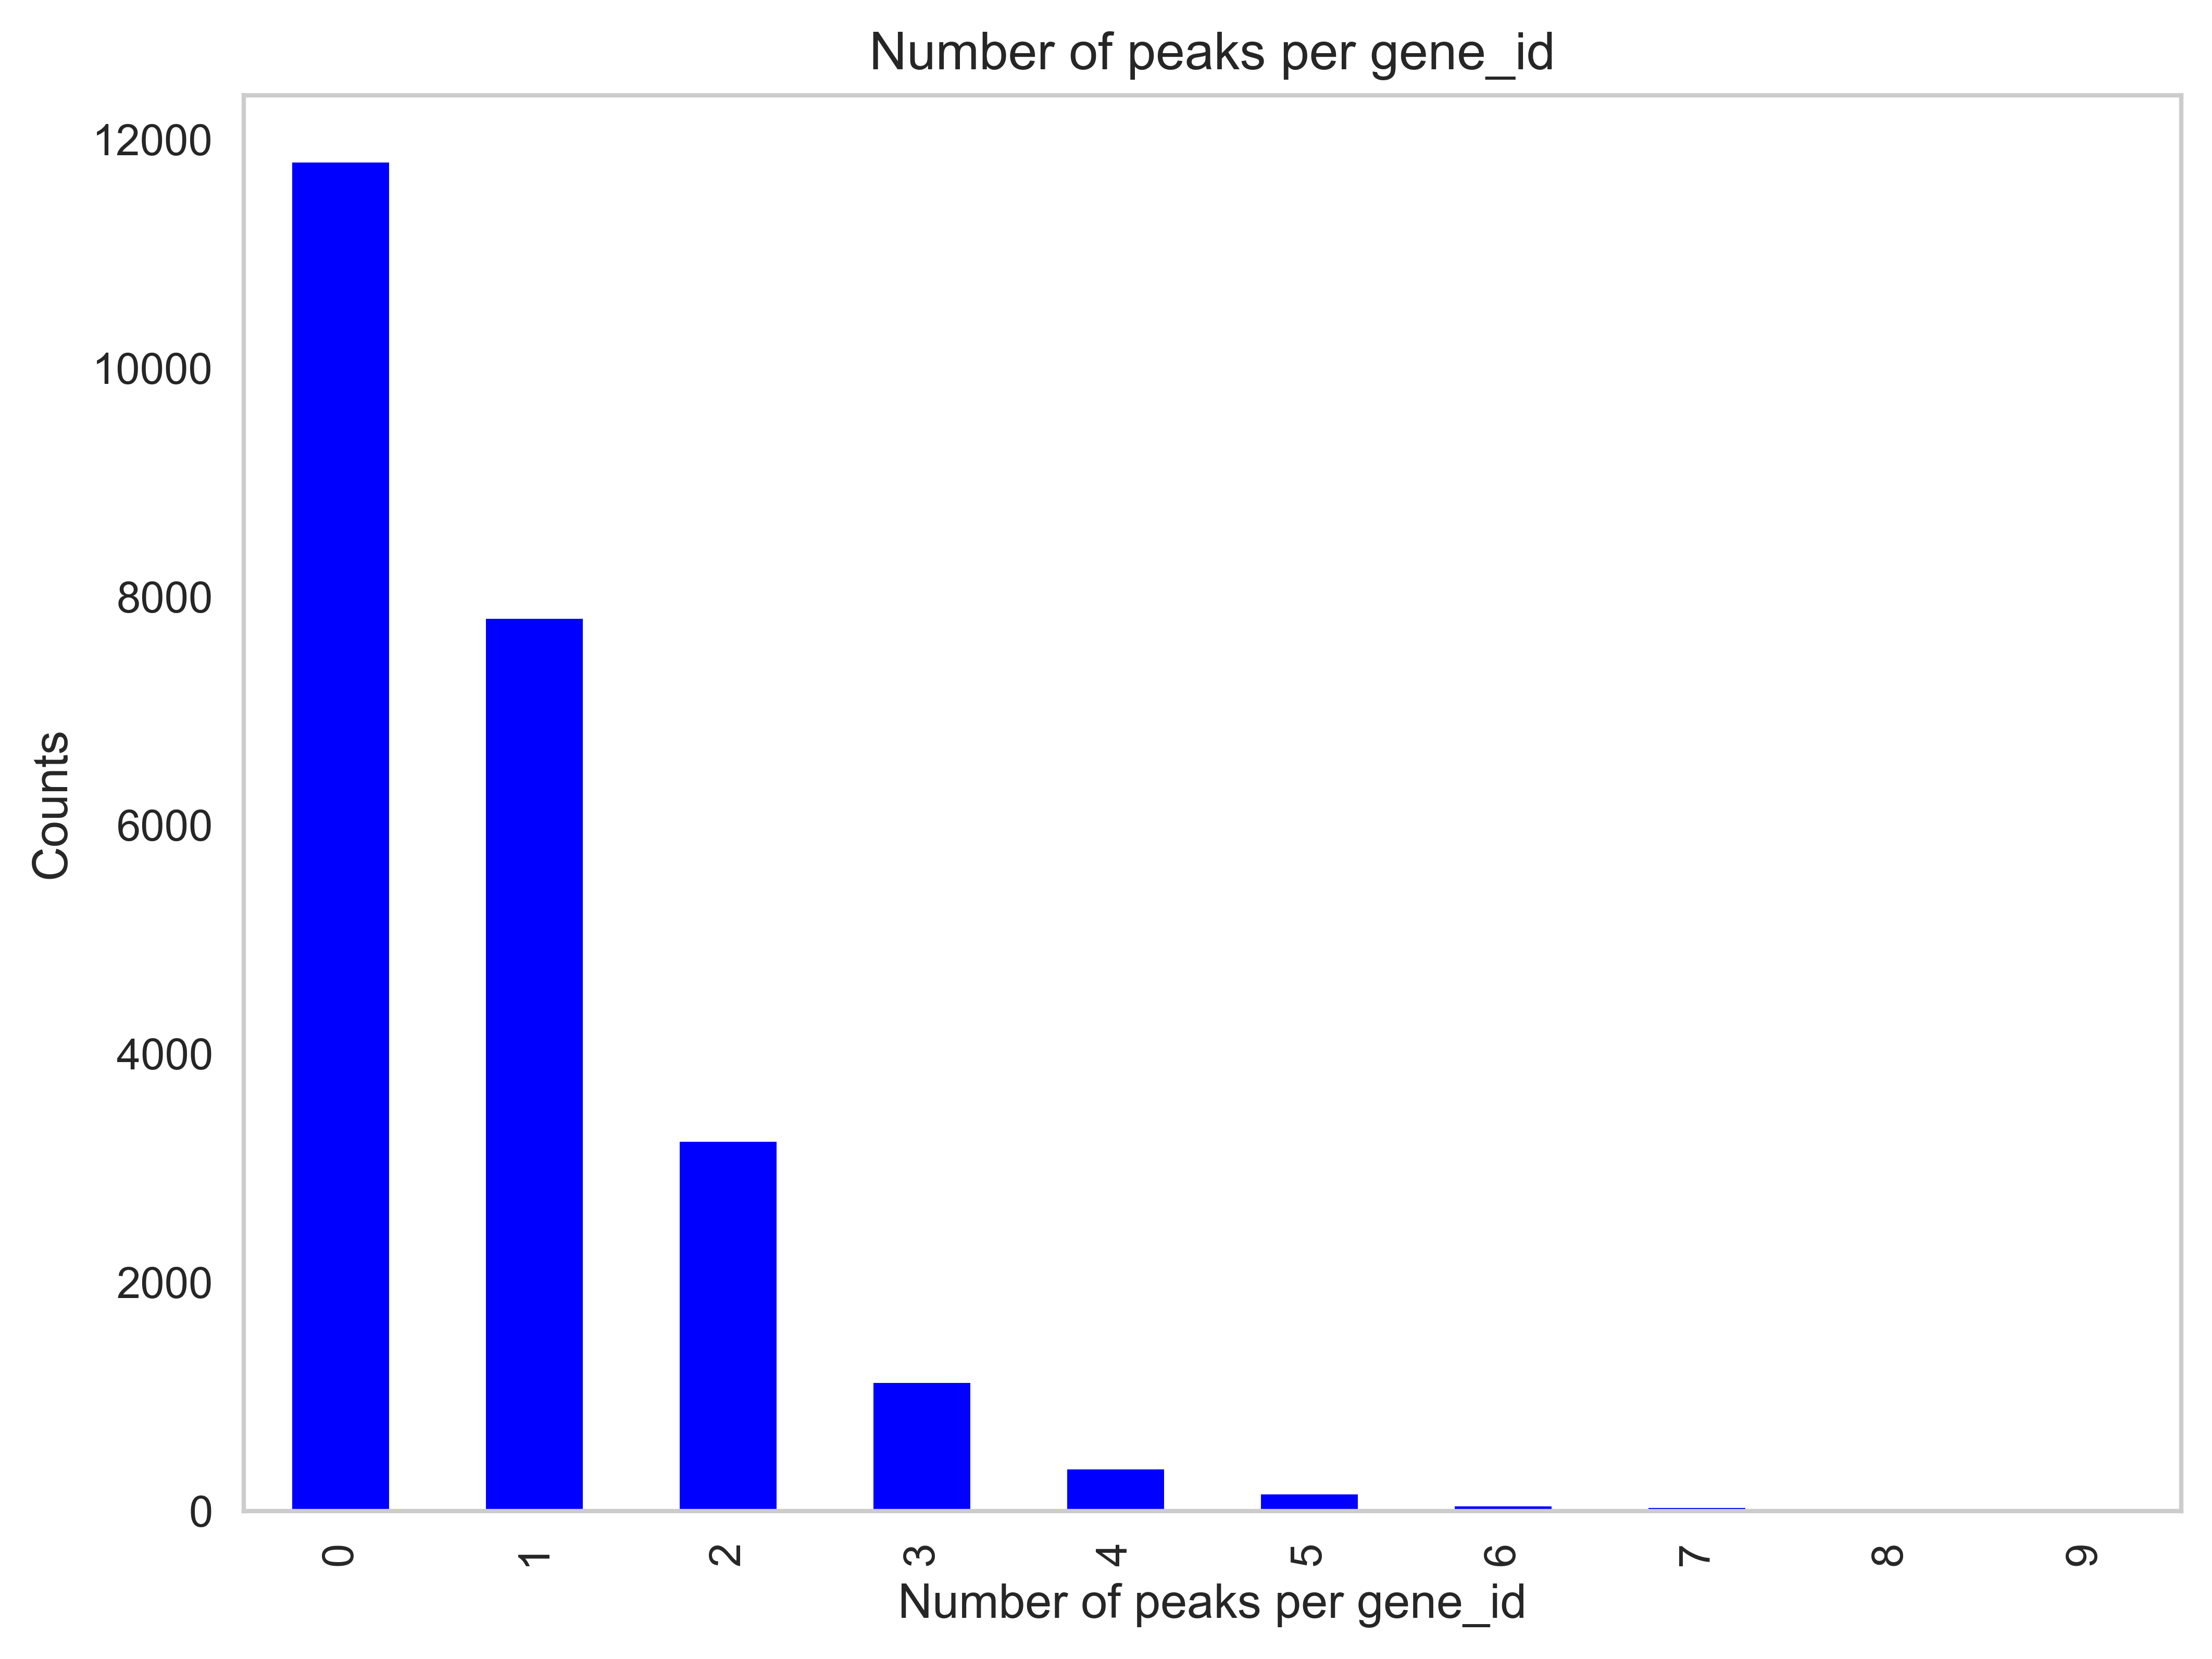

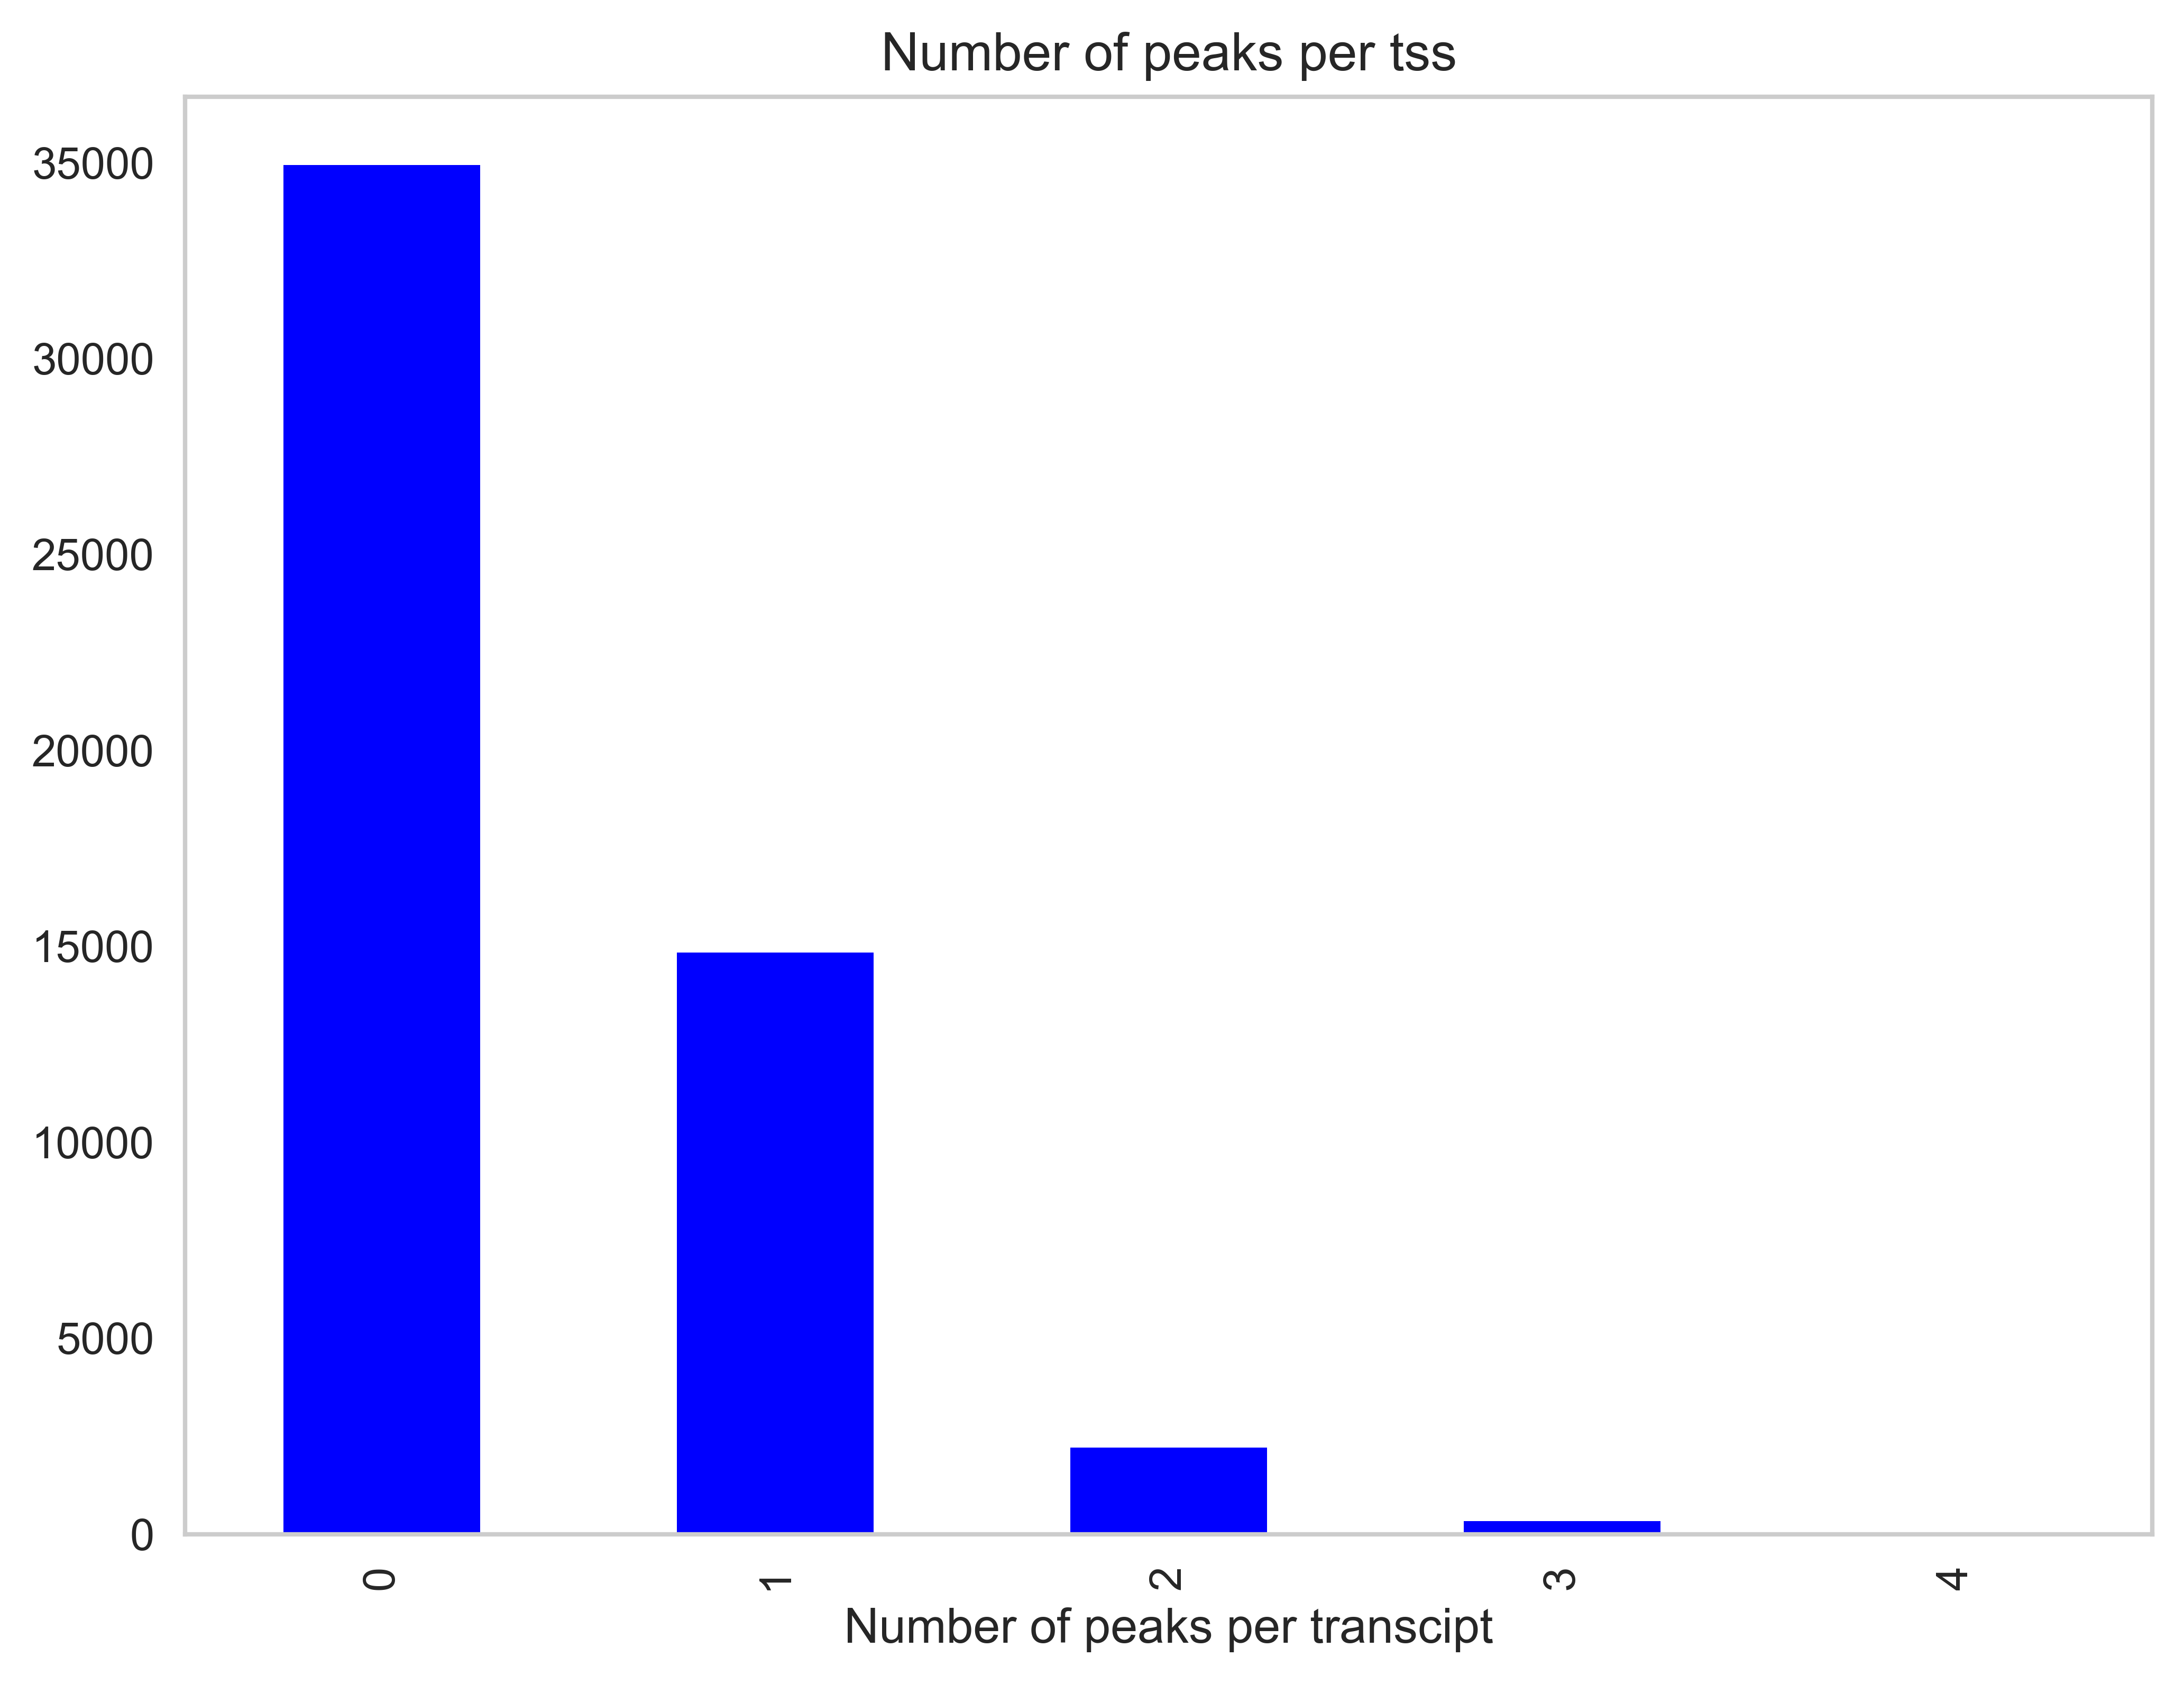

In [14]:
#sns.distplot(start_sites_gff['Experimental'],kde=False,norm_hist=False)

f = plt.figure(dpi=300);
ax = f.add_subplot(1,1,1);
#ax.hist(gene_df['Number of SS']);

gene_df_small = gene_df[gene_df['Number of SS']<10]
gene_df_small.groupby(['Number of SS']).count()['hasGene'].plot.bar(color='b')
ax.set_xlabel('Number of peaks per gene')
ax.set_ylabel('Counts')
#ax.set_xticks(range(0,max(gene_df['Number of SS'])+1,2))
print('Number of genes with greater than 10 peaks:',np.sum(gene_df['Number of SS']>10))
plt.title('Number of peaks per gene')
plt.tight_layout()
plt.savefig('Results/Figures/Number_of_peaks_per_gene.pdf')

#sns.distplot(start_sites_gff['Experimental'],kde=False,norm_hist=False)

f = plt.figure(dpi=300);
ax = f.add_subplot(1,1,1);
#ax.hist(gene_id_df['Number of SS']);
gene_id_df_small = gene_id_df[gene_id_df['Number of SS']<10]
gene_id_df_small.groupby(['Number of SS']).count()['hasGene'].plot.bar(color='b')
ax.set_xlabel('Number of peaks per gene_id')
ax.set_ylabel('Counts')
#ax.set_xticks(range(0,max(gene_id_df['Number of SS'])+1,2))
print('Number of genes with greater than 10 peaks:',np.sum(gene_id_df['Number of SS']>10))
plt.title('Number of peaks per gene_id')
plt.savefig('Results/Figures/Number_of_peaks_per_gene_id.pdf')

#sns.distplot(start_sites_gff['Experimental'],kde=False,norm_hist=False)

f = plt.figure(dpi=300);
ax = f.add_subplot(1,1,1);
#ax.hist(txn_df['Number of SS']);
txn_df_small = txn_df[txn_df['Number of SS']<10]
txn_df_small.groupby(['Number of SS']).count()['hasGene'].plot.bar(color='b')
ax.set_xlabel('Number of peaks per transcipt')
#ax.set_xticks(range(0,max(txn_df['Number of SS'])+1,2))
print('Number of genes with greater than 10 peaks:',np.sum(txn_df['Number of SS']>10))

plt.title('Number of peaks per tss')
plt.savefig('Results/Figures/Number_of_peaks_per_txn.pdf')

### Tissues overall gene expression

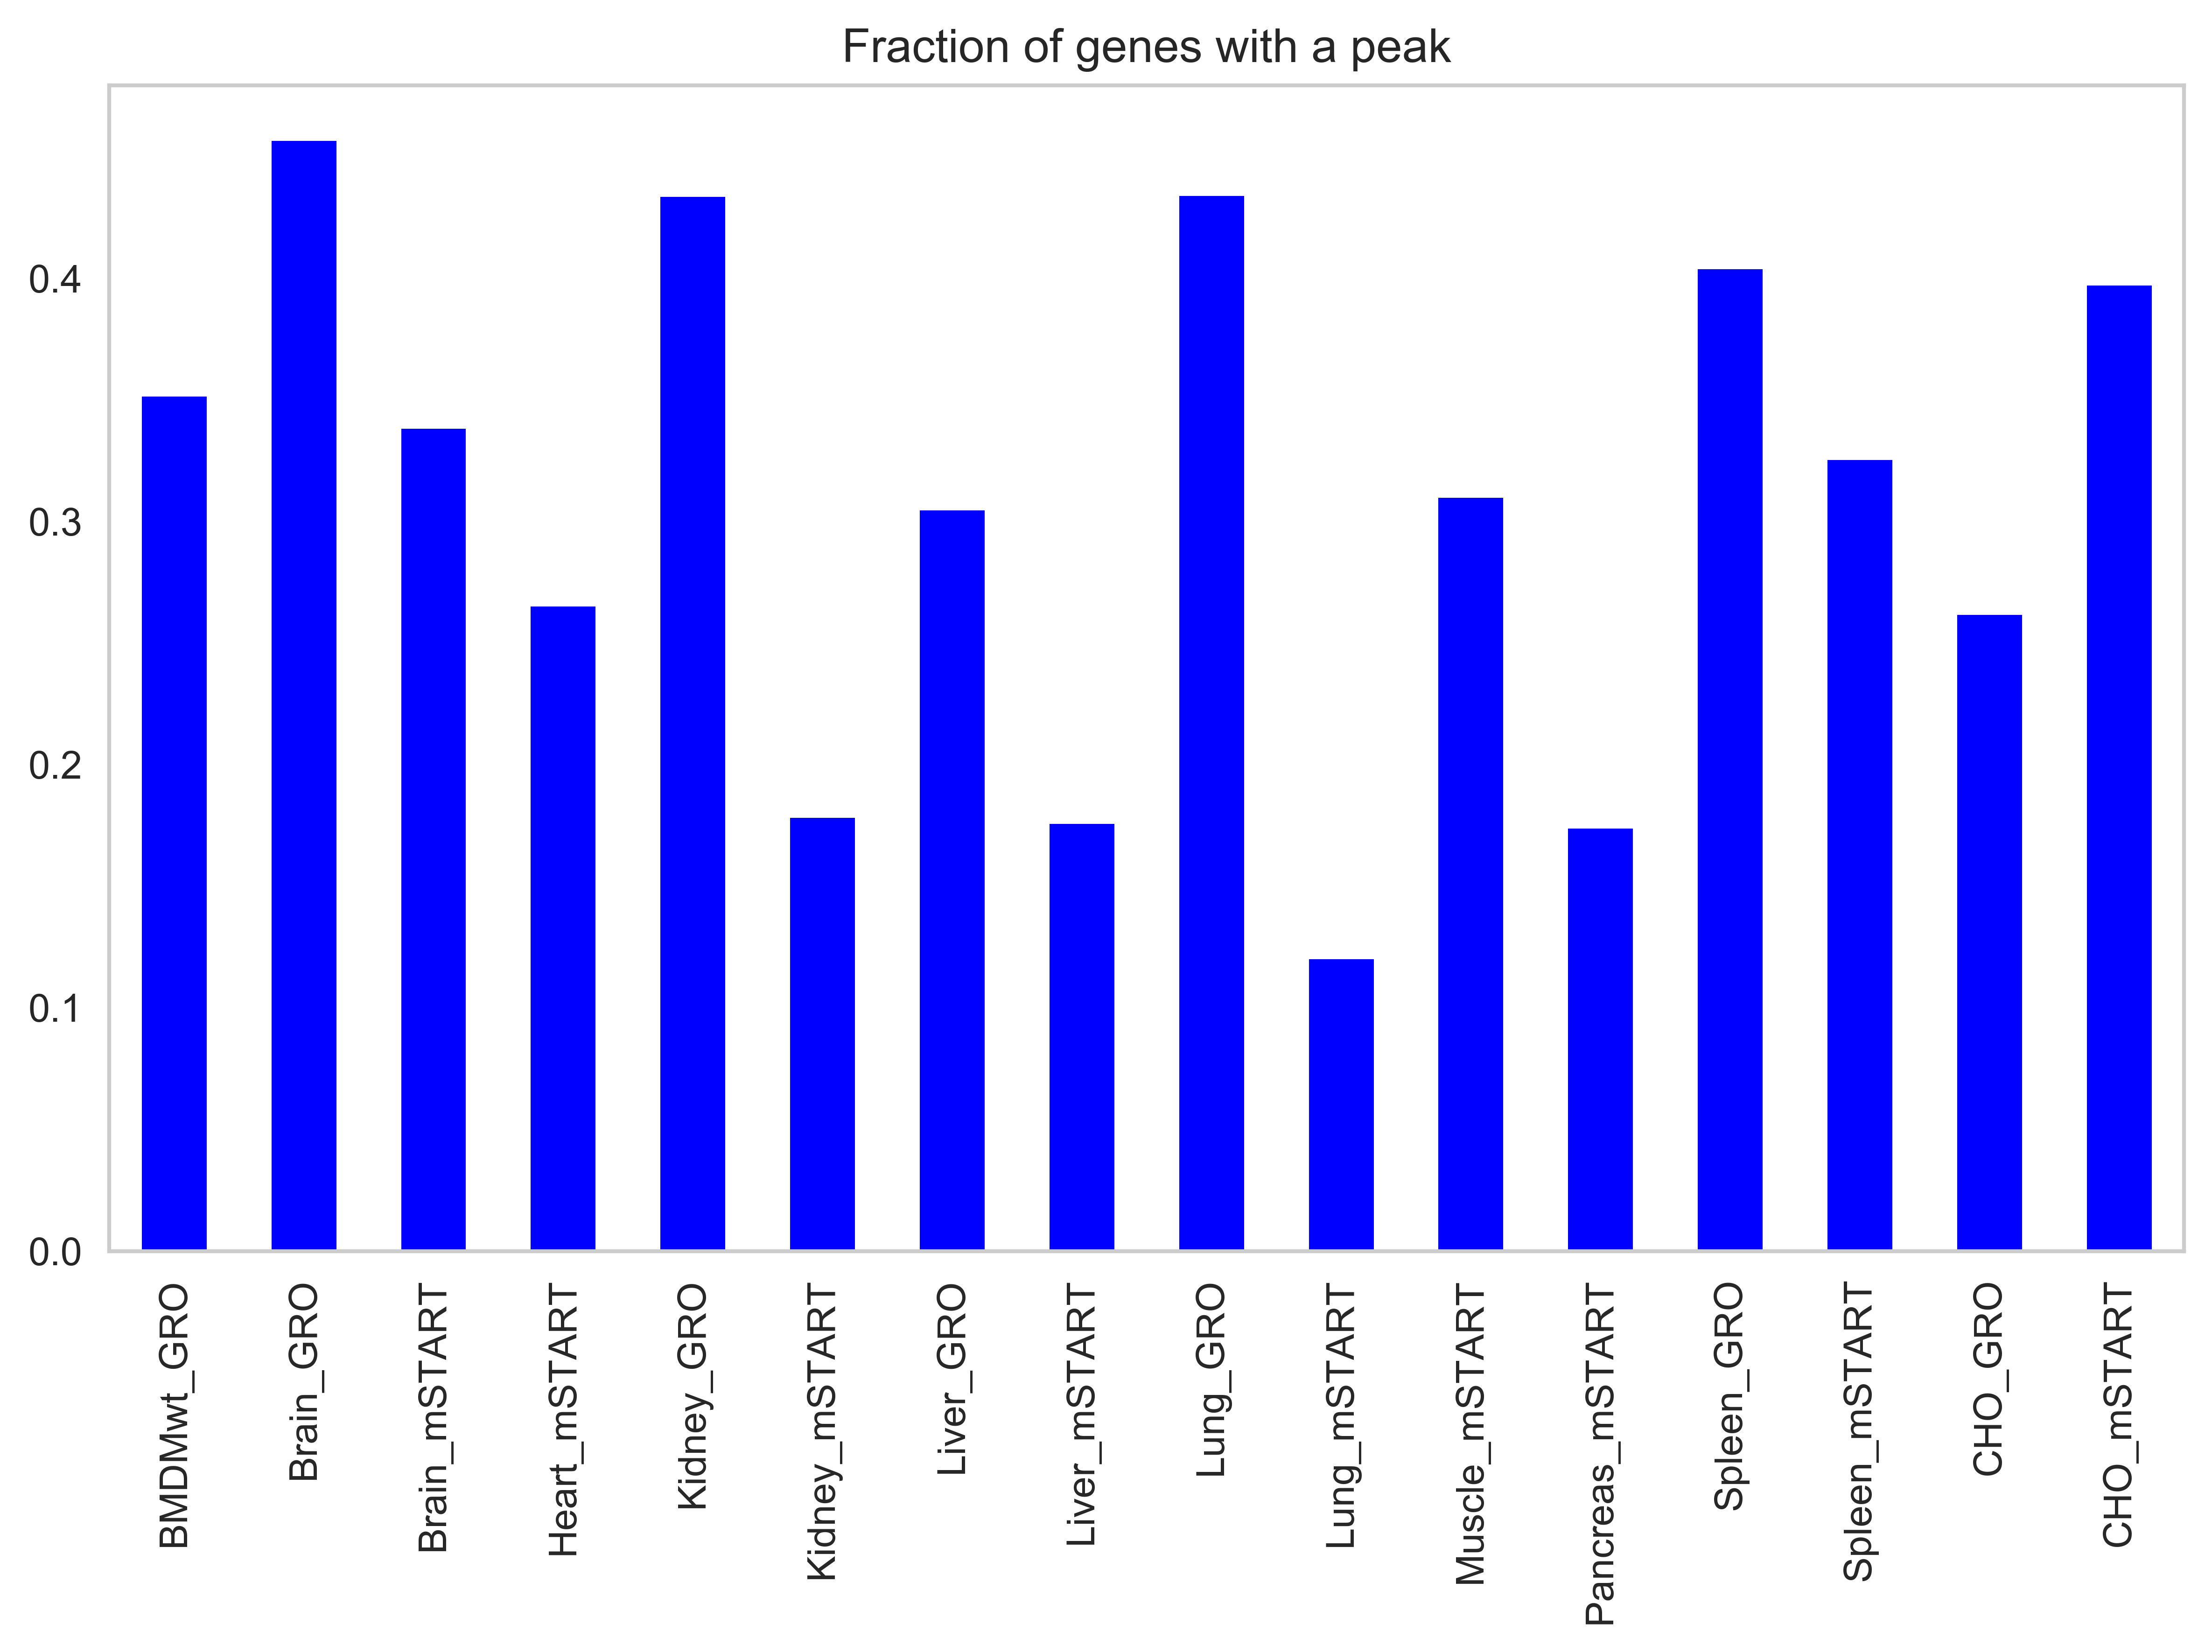

In [15]:
f = plt.figure(dpi=300)
ax = (np.sum((gene_tissue_matrix>0))/gene_df.shape[0]).plot.bar(color='b')
ax.set_title('Fraction of genes with a peak');
ax.set_xticklabels(meta_samples.loc[gene_tissue_matrix.columns,'Short']);
plt.tight_layout()
plt.savefig('Results/Figures/tissue_genes.pdf')

## Collapse experimental type 

Text(0.5,1,u'TSS across tissues')

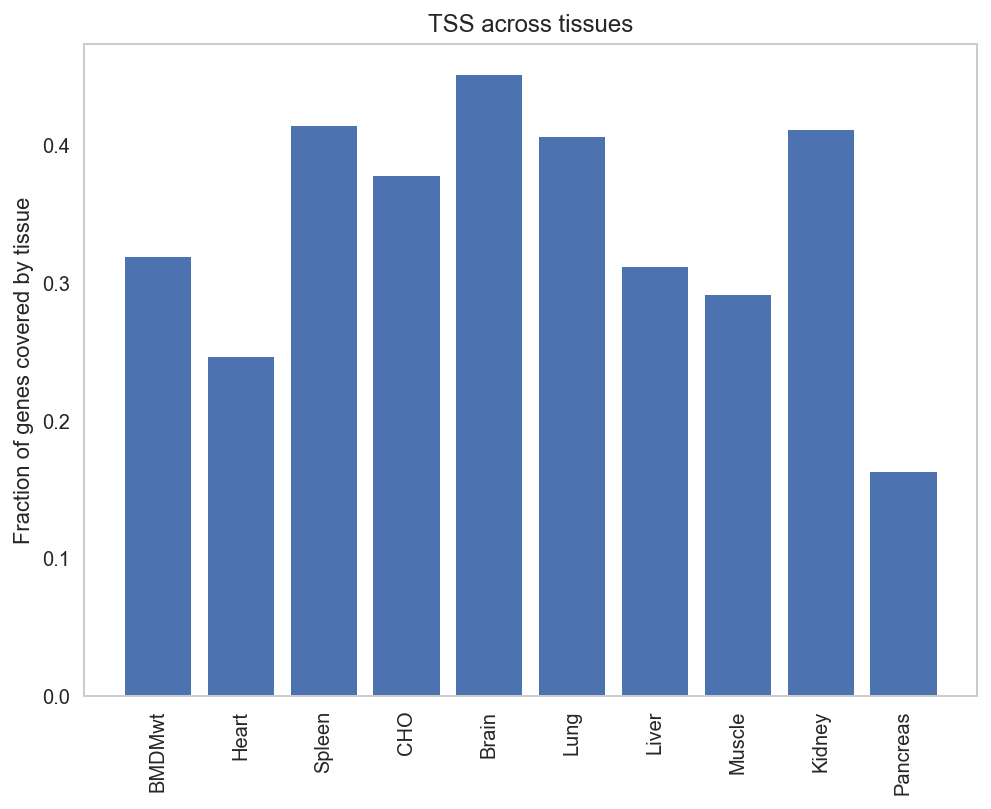

In [16]:
tissues_genes = dict()
for t in tissues:
    tissues_genes[t] = 0

for ind,val in gene_df.iterrows():
    curr_ts = set()
    for t in val['maxTissues']:
        curr_ts.add(t.split('_')[0])
    for t in curr_ts:
        tissues_genes[t] += 1
        if '1h' in t or 'KLA' in t:
            print(t)

no_peak = []
for t in tissues_genes:
    if tissues_genes[t] == 0:
        no_peak.append(t)

for t in no_peak:
    tissues_genes.pop(t,None)

plt.bar(range(len(tissues_genes)), 1.0*np.array(tissues_genes.values())/(gene_df.shape[0]), align='center')
plt.xticks(range(len(tissues_genes)), list(tissues_genes.keys()),rotation=90);
plt.ylabel('Fraction of genes covered by tissue')
plt.title('TSS across tissues')

### Tissue Distribution

/home/isshamie/software/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


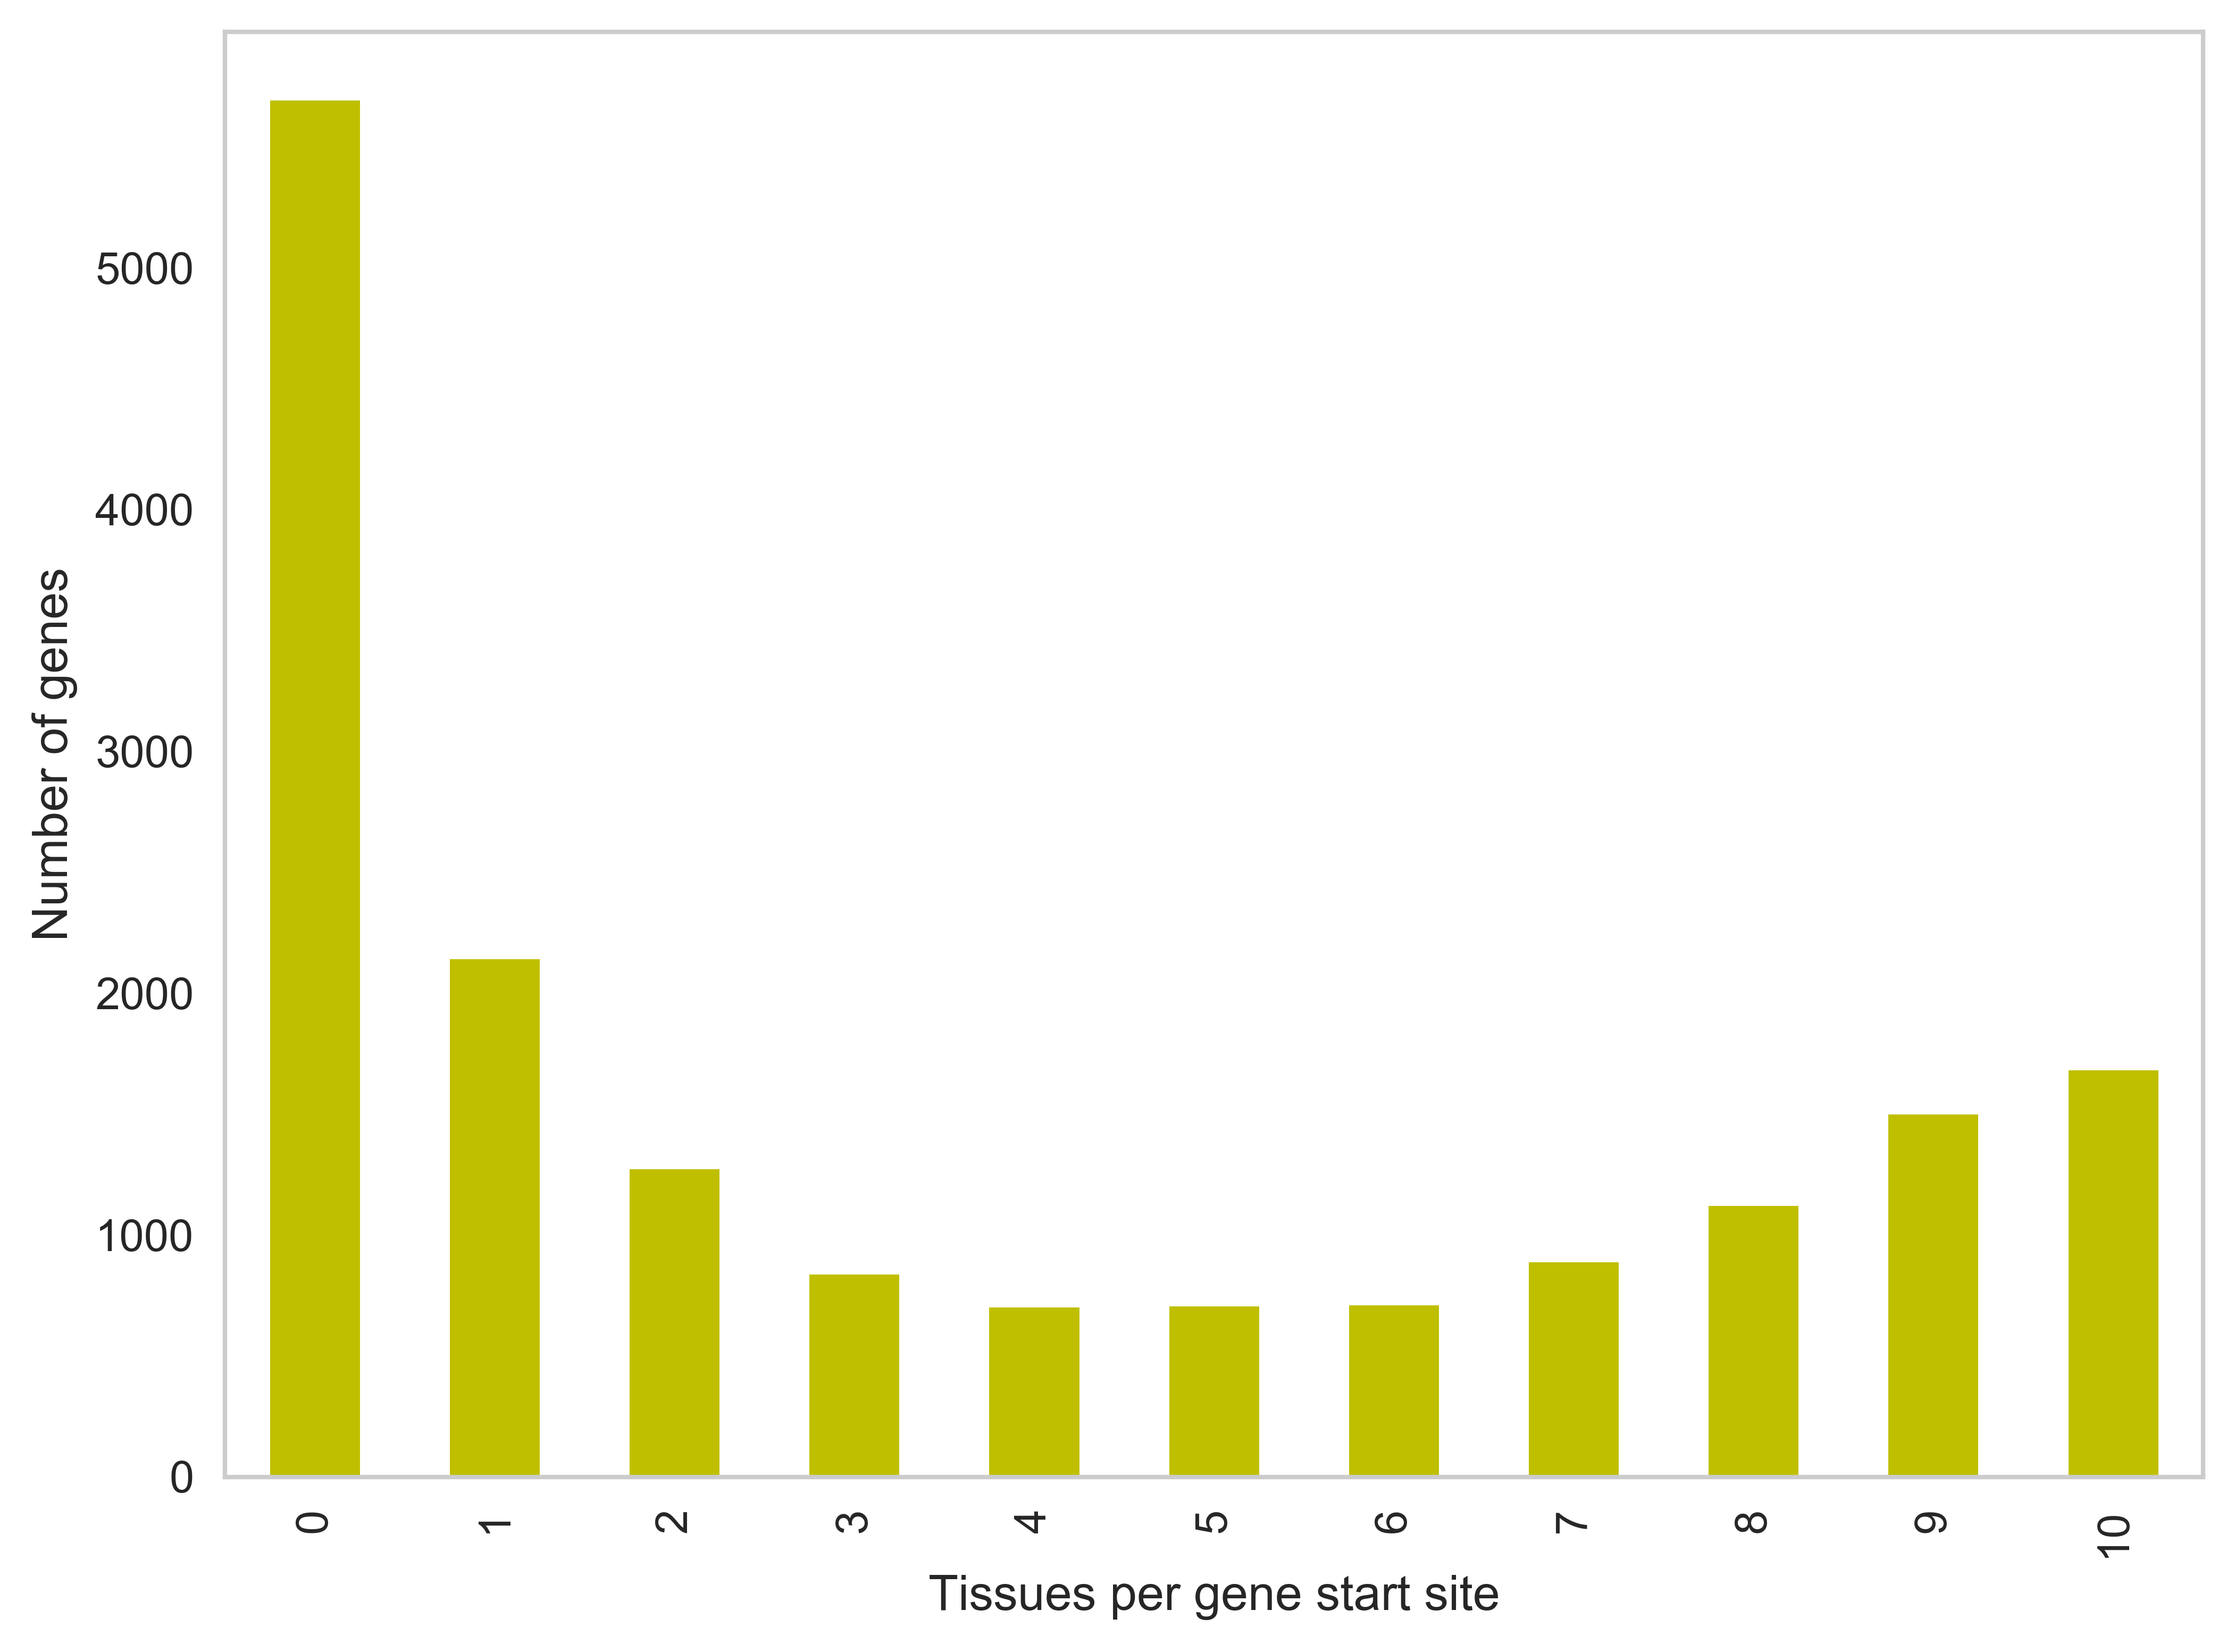

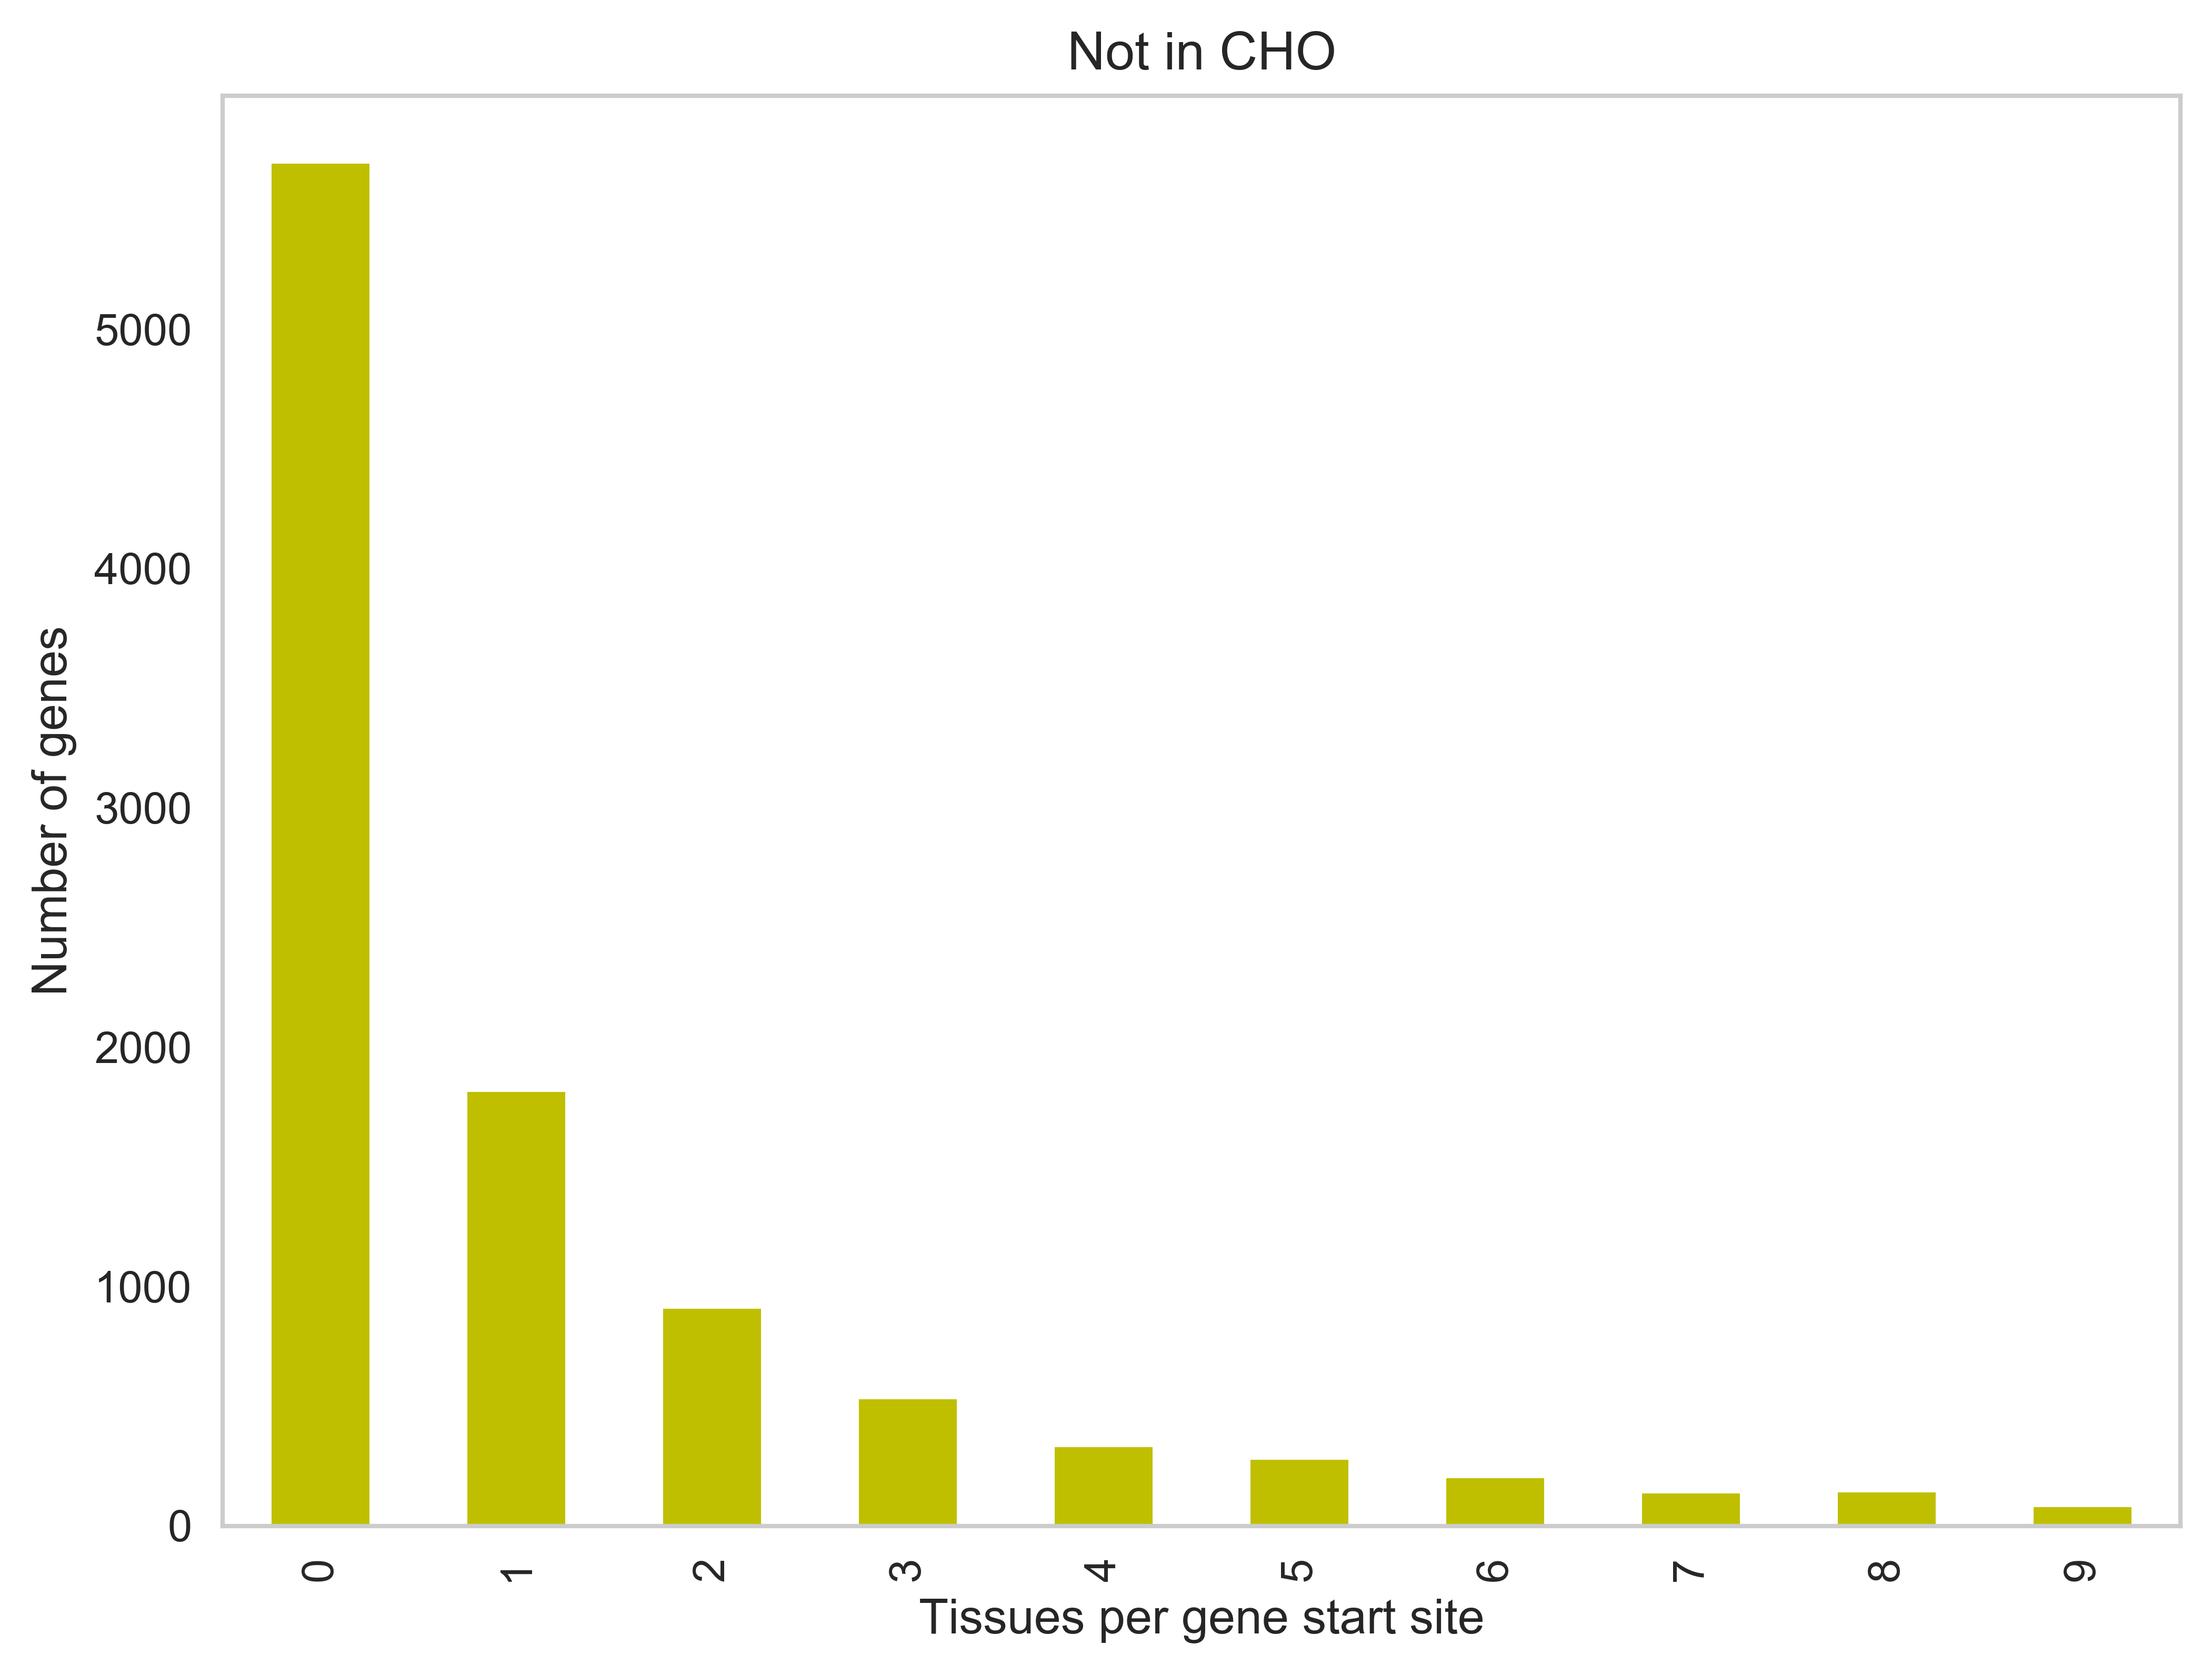

In [17]:
not_in_cho = []
in_cho = []
all_t = []
for g in gene_df['tissues']:
    curr = [i.split('_')[0] for i in g ]
    curr = np.unique(np.array(curr))
    if 'CHO' in curr:
        in_cho.append(len(curr))
    else:
        not_in_cho.append(len(curr))
    all_t.append(len(curr))

f = plt.figure(dpi=300)
pd.Series(Counter(all_t)).plot.bar(color='y')
plt.xlabel('Tissues per gene start site')
plt.ylabel('Number of genes')
plt.savefig('Results/Figures/num_tissues.pdf',bbox_inches='tight')

f = plt.figure(dpi=300)
pd.Series(Counter(not_in_cho)).plot.bar(color='y')
plt.xlabel('Tissues per gene start site')
plt.title('Not in CHO')
plt.ylabel('Number of genes')
plt.savefig('Results/Figures/num_tissues_not_in_cho.pdf',bbox_inches='tight')

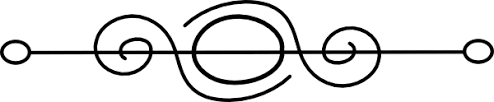

In [16]:
from IPython.display import Image
Image(filename='/home/isshamie/chapter_break.png')

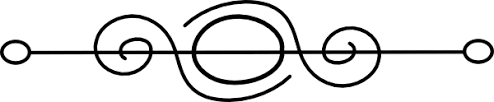

In [16]:
from IPython.display import Image
Image(filename='/home/isshamie/chapter_break.png')

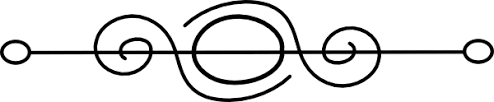

In [16]:
from IPython.display import Image
Image(filename='/home/isshamie/chapter_break.png')

# 1kb - 1kb

In [66]:
txn_df = pickle.load(open('Results/txn_df_1kb_1kb.p','rb'))
gene_df = pickle.load(open('Results/gene_df_1kb_1kb.p','rb'))
gene_id_df = pickle.load(open('Results/gene_id_df_1kb_1kb.p','rb'))
gene_tissue_matrix = pd.read_csv('Results/merged/genes_tissues_1kb_1kb.csv',index_col = 0)

In [67]:
print('Percent of isoforms identified: ', 1.0*np.sum(txn_df['hasGene'])/txn_df.shape[0])
print('Percent of genes identified: ', 1.0*np.sum(gene_df['hasGene'])/gene_df.shape[0])

('Percent of isoforms identified: ', 0.4422129739223397)
('Percent of genes identified: ', 0.8129421315087556)


('Number of genes with greater than 10 peaks:', 62)
('Number of genes with greater than 10 peaks:', 35)
('Number of genes with greater than 10 peaks:', 0)


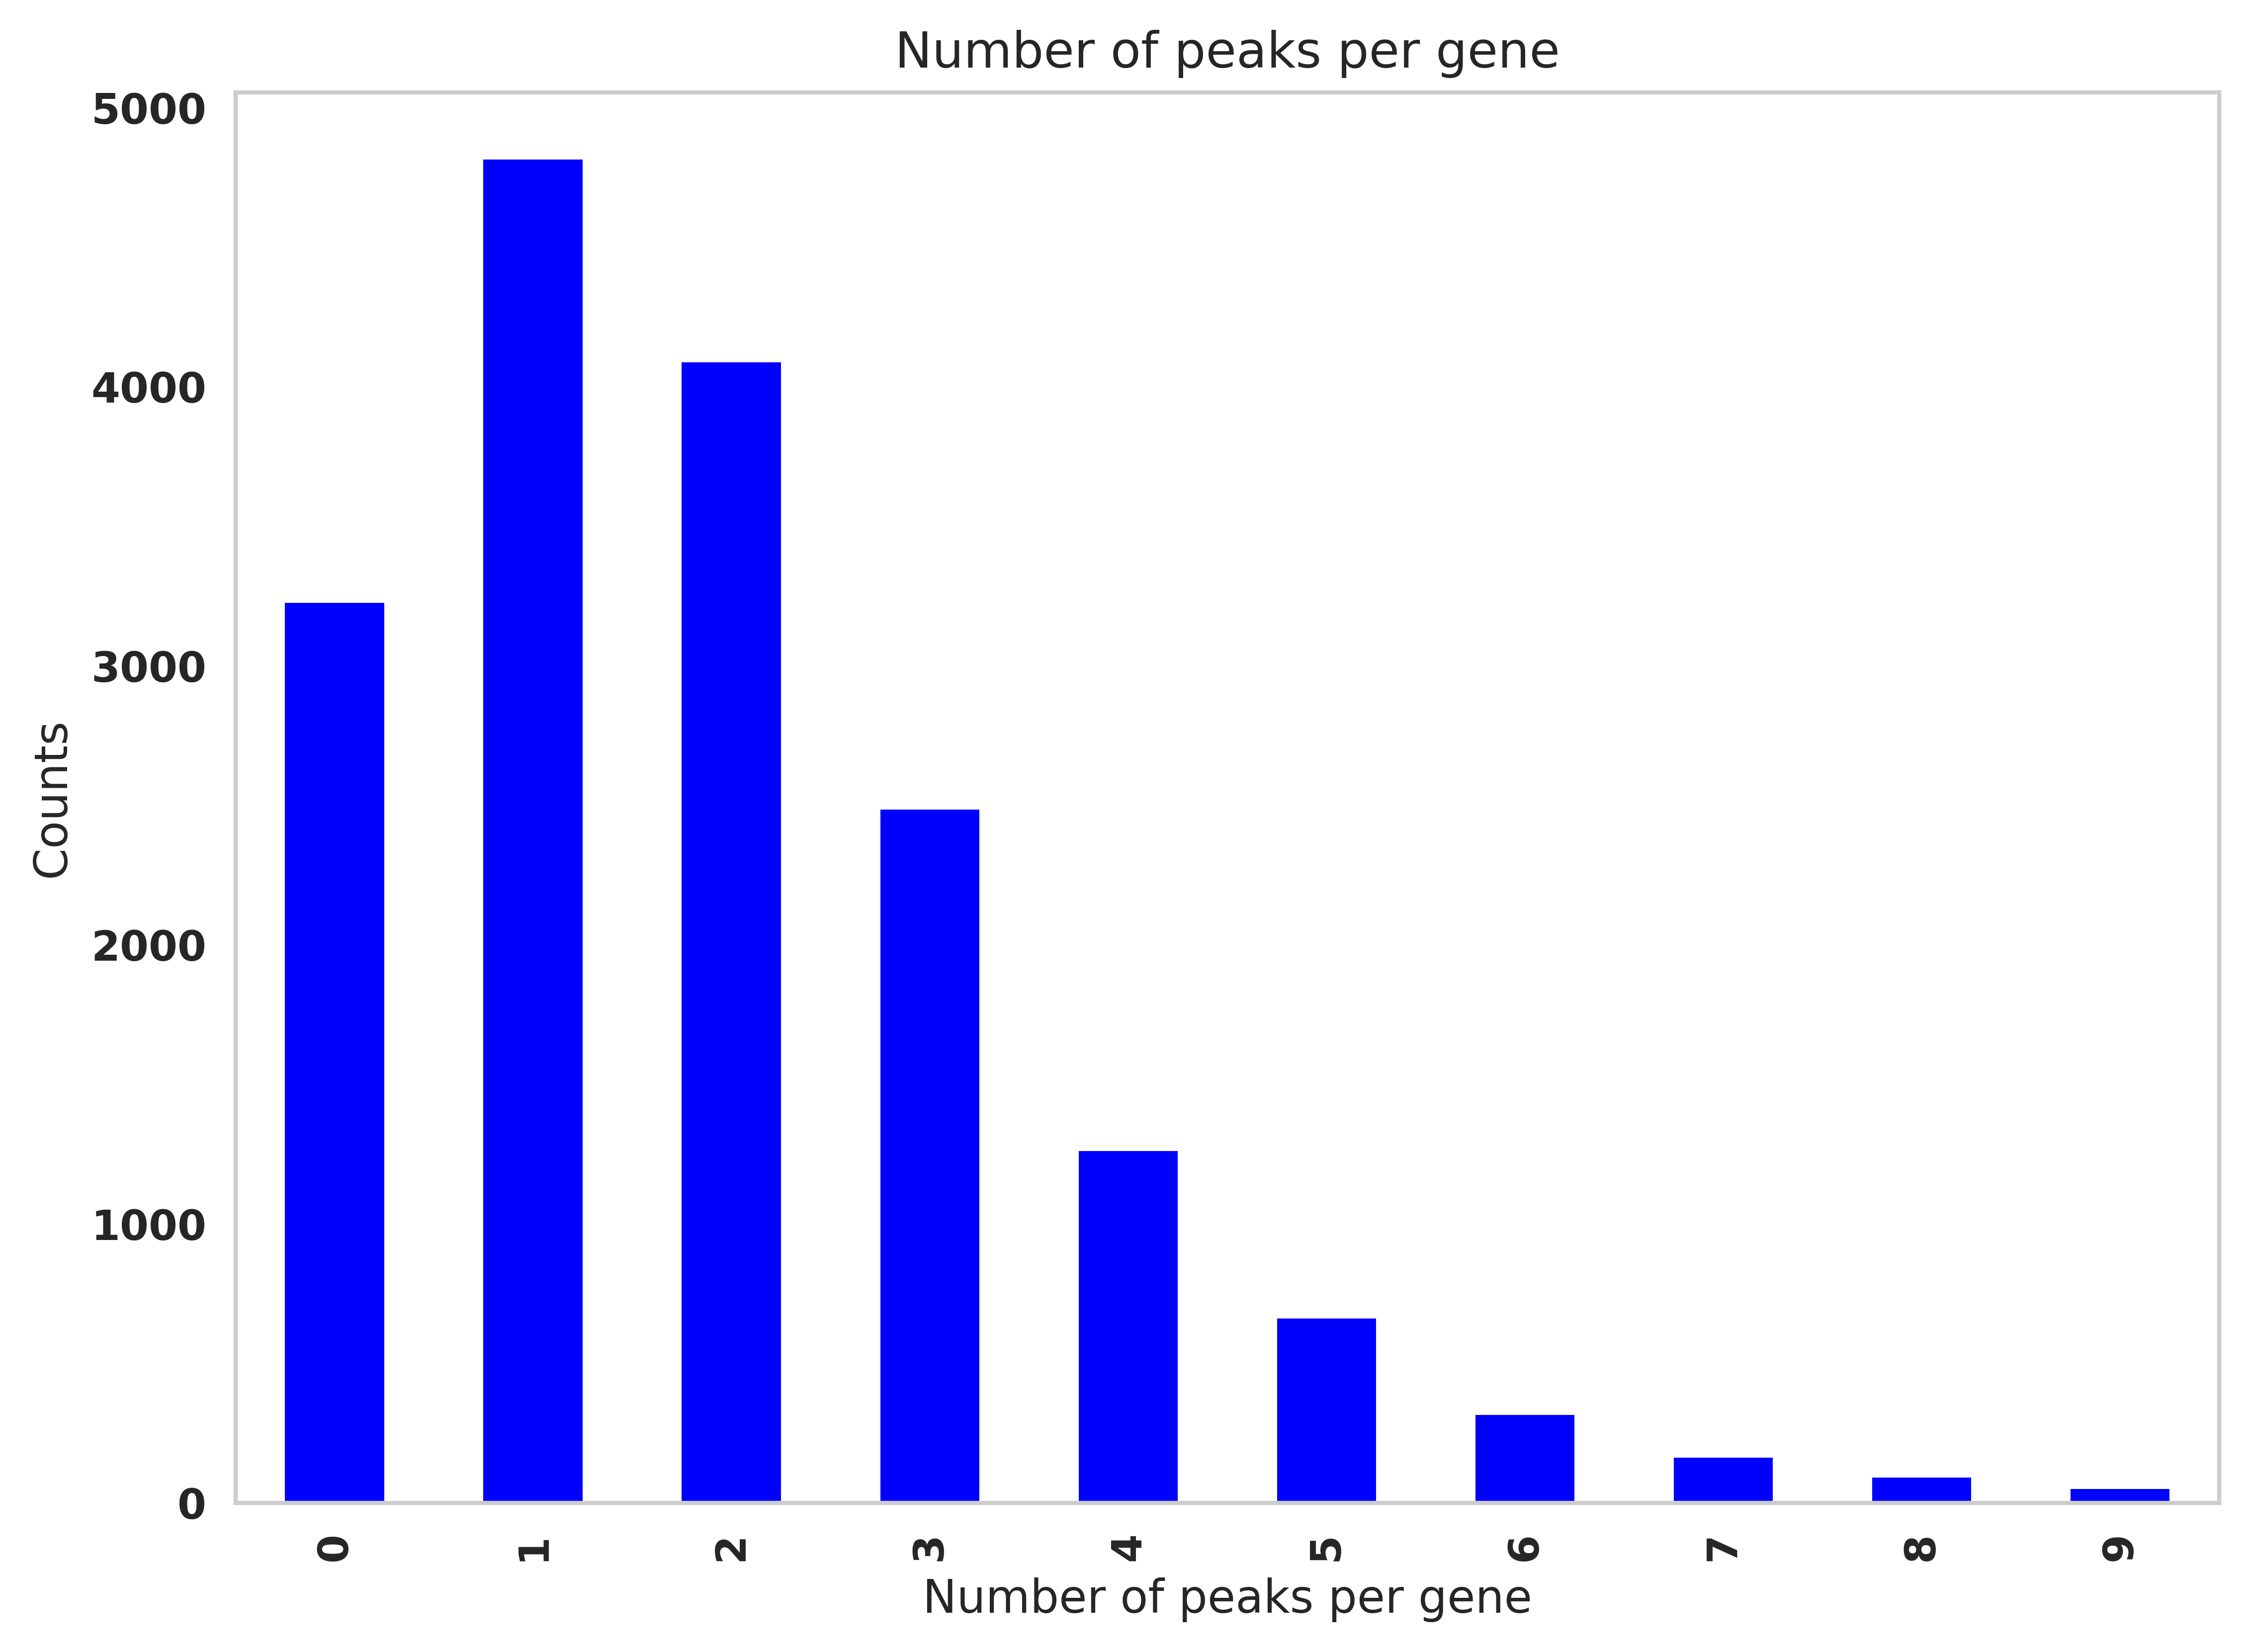

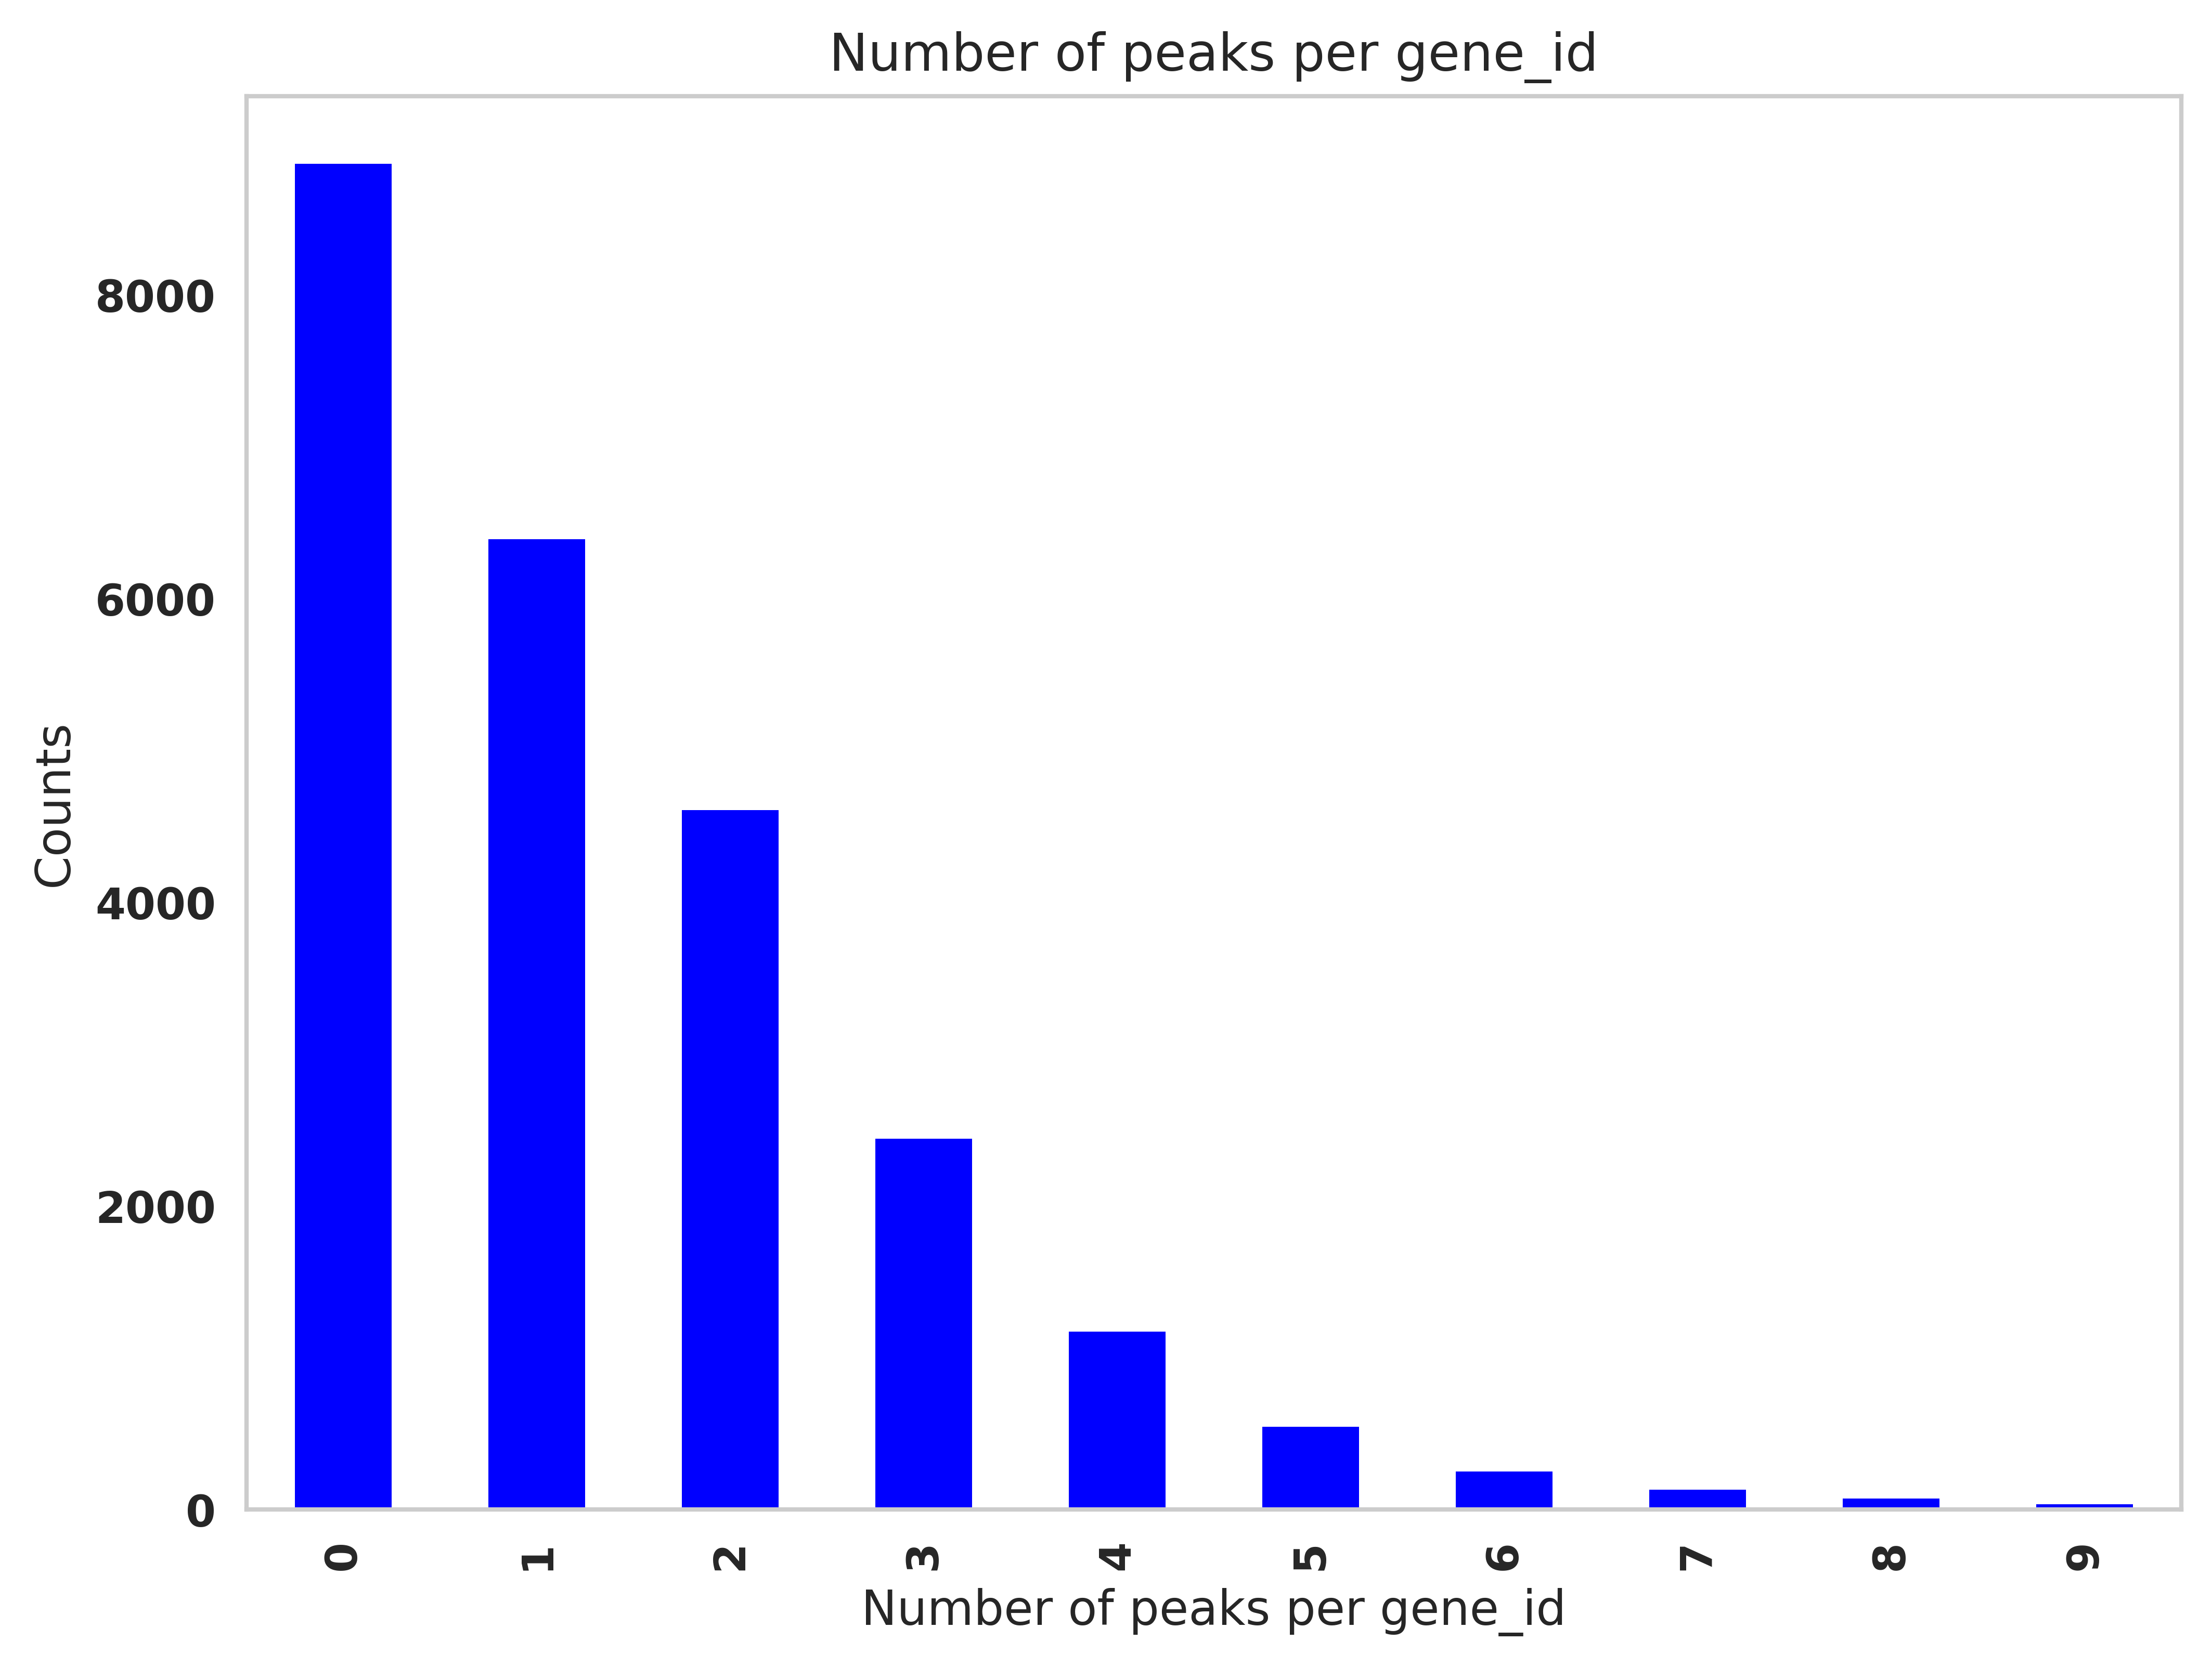

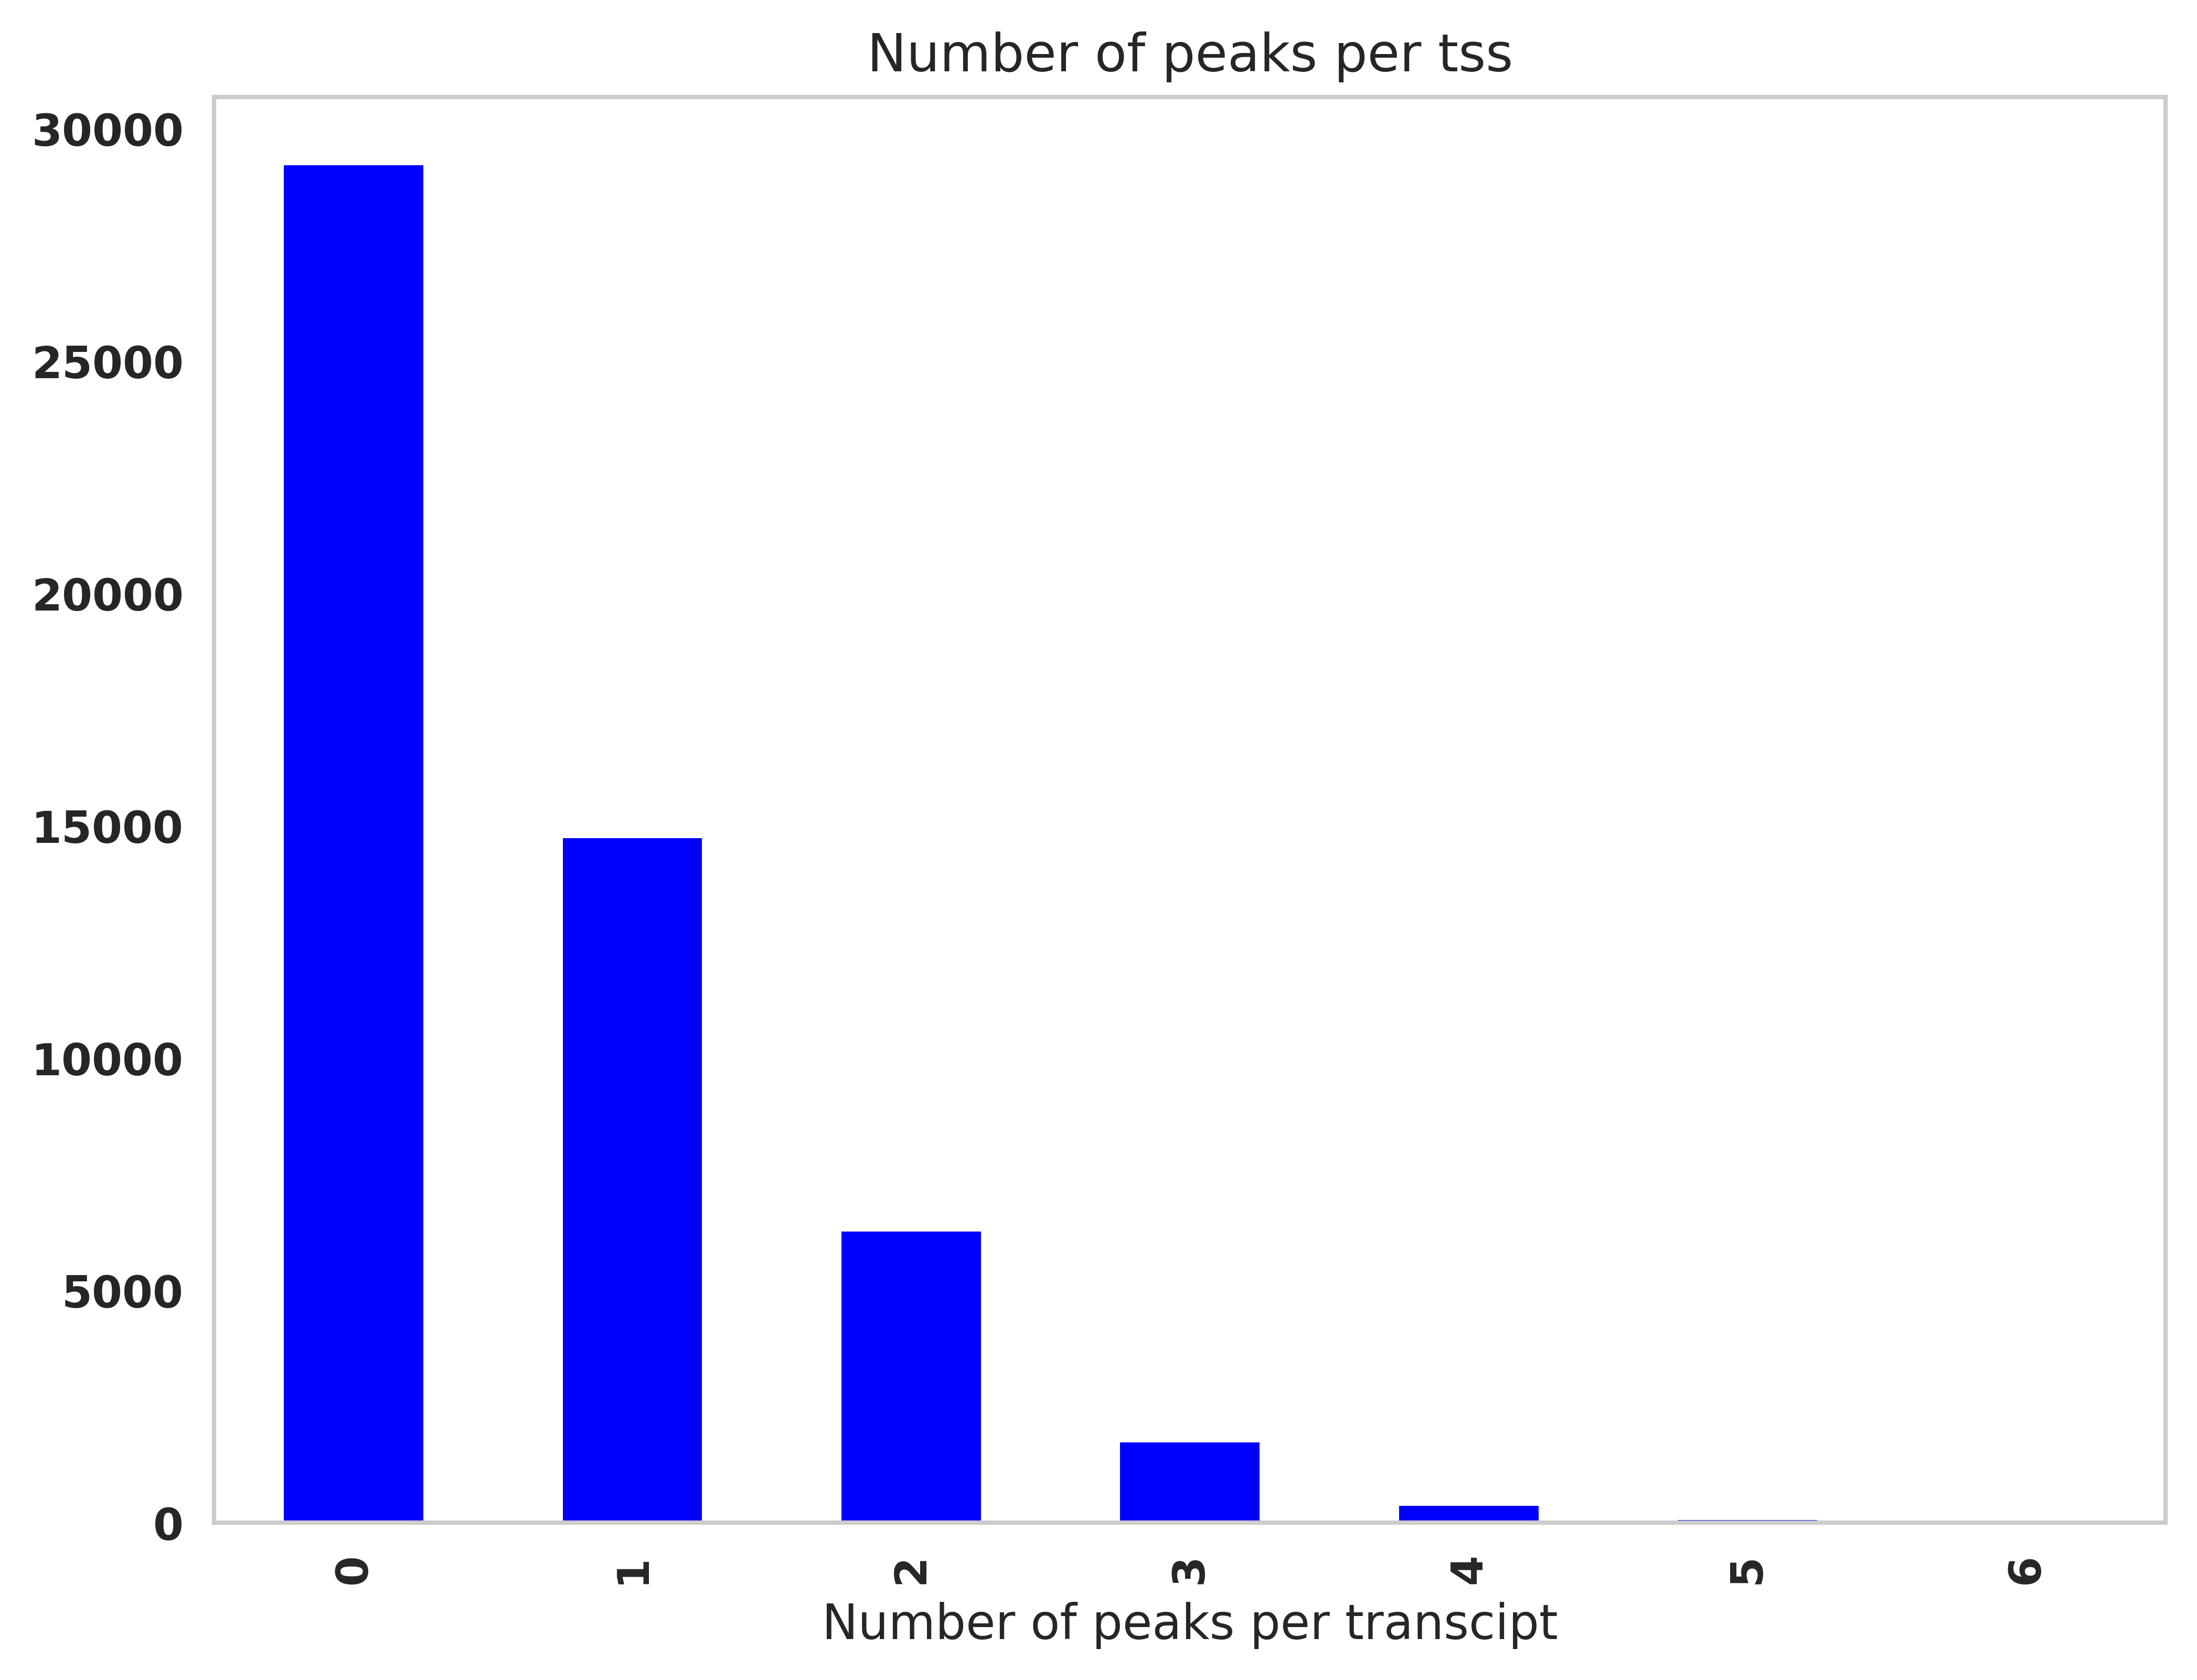

In [68]:
#sns.distplot(start_sites_gff['Experimental'],kde=False,norm_hist=False)

f = plt.figure(dpi=300);
ax = f.add_subplot(1,1,1);
#ax.hist(gene_df['Number of SS']);
gene_df_small = gene_df[gene_df['Number of SS']<10]
gene_df_small.groupby(['Number of SS']).count()['hasGene'].plot.bar(color='b')
ax.set_xlabel('Number of peaks per gene')
ax.set_ylabel('Counts')
#ax.set_xticks(range(0,max(gene_df['Number of SS'])+1,2))
print('Number of genes with greater than 10 peaks:',np.sum(gene_df['Number of SS']>10))
plt.title('Number of peaks per gene')
plt.tight_layout()
plt.savefig('Results/Figures/Number_of_peaks_per_gene_1kb_1kb.pdf')

#sns.distplot(start_sites_gff['Experimental'],kde=False,norm_hist=False)

f = plt.figure(dpi=300);
ax = f.add_subplot(1,1,1);
#ax.hist(gene_id_df['Number of SS']);
gene_id_df_small = gene_id_df[gene_id_df['Number of SS']<10]
gene_id_df_small.groupby(['Number of SS']).count()['hasGene'].plot.bar(color='b')
ax.set_xlabel('Number of peaks per gene_id')
ax.set_ylabel('Counts')
#ax.set_xticks(range(0,max(gene_id_df['Number of SS'])+1,2))
print('Number of genes with greater than 10 peaks:',np.sum(gene_id_df['Number of SS']>10))
plt.title('Number of peaks per gene_id')
plt.savefig('Results/Figures/Number_of_peaks_per_gene_id_1kb_1kb.pdf')

#sns.distplot(start_sites_gff['Experimental'],kde=False,norm_hist=False)

f = plt.figure(dpi=300);
ax = f.add_subplot(1,1,1);
#ax.hist(txn_df['Number of SS']);
txn_df_small = txn_df[txn_df['Number of SS']<10]
txn_df_small.groupby(['Number of SS']).count()['hasGene'].plot.bar(color='b')
ax.set_xlabel('Number of peaks per transcipt')
#ax.set_xticks(range(0,max(txn_df['Number of SS'])+1,2))
print('Number of genes with greater than 10 peaks:',np.sum(txn_df['Number of SS']>10))

plt.title('Number of peaks per tss')
plt.savefig('Results/Figures/Number_of_peaks_per_txn_1kb_1kb.pdf')

### Tissues overall gene expression

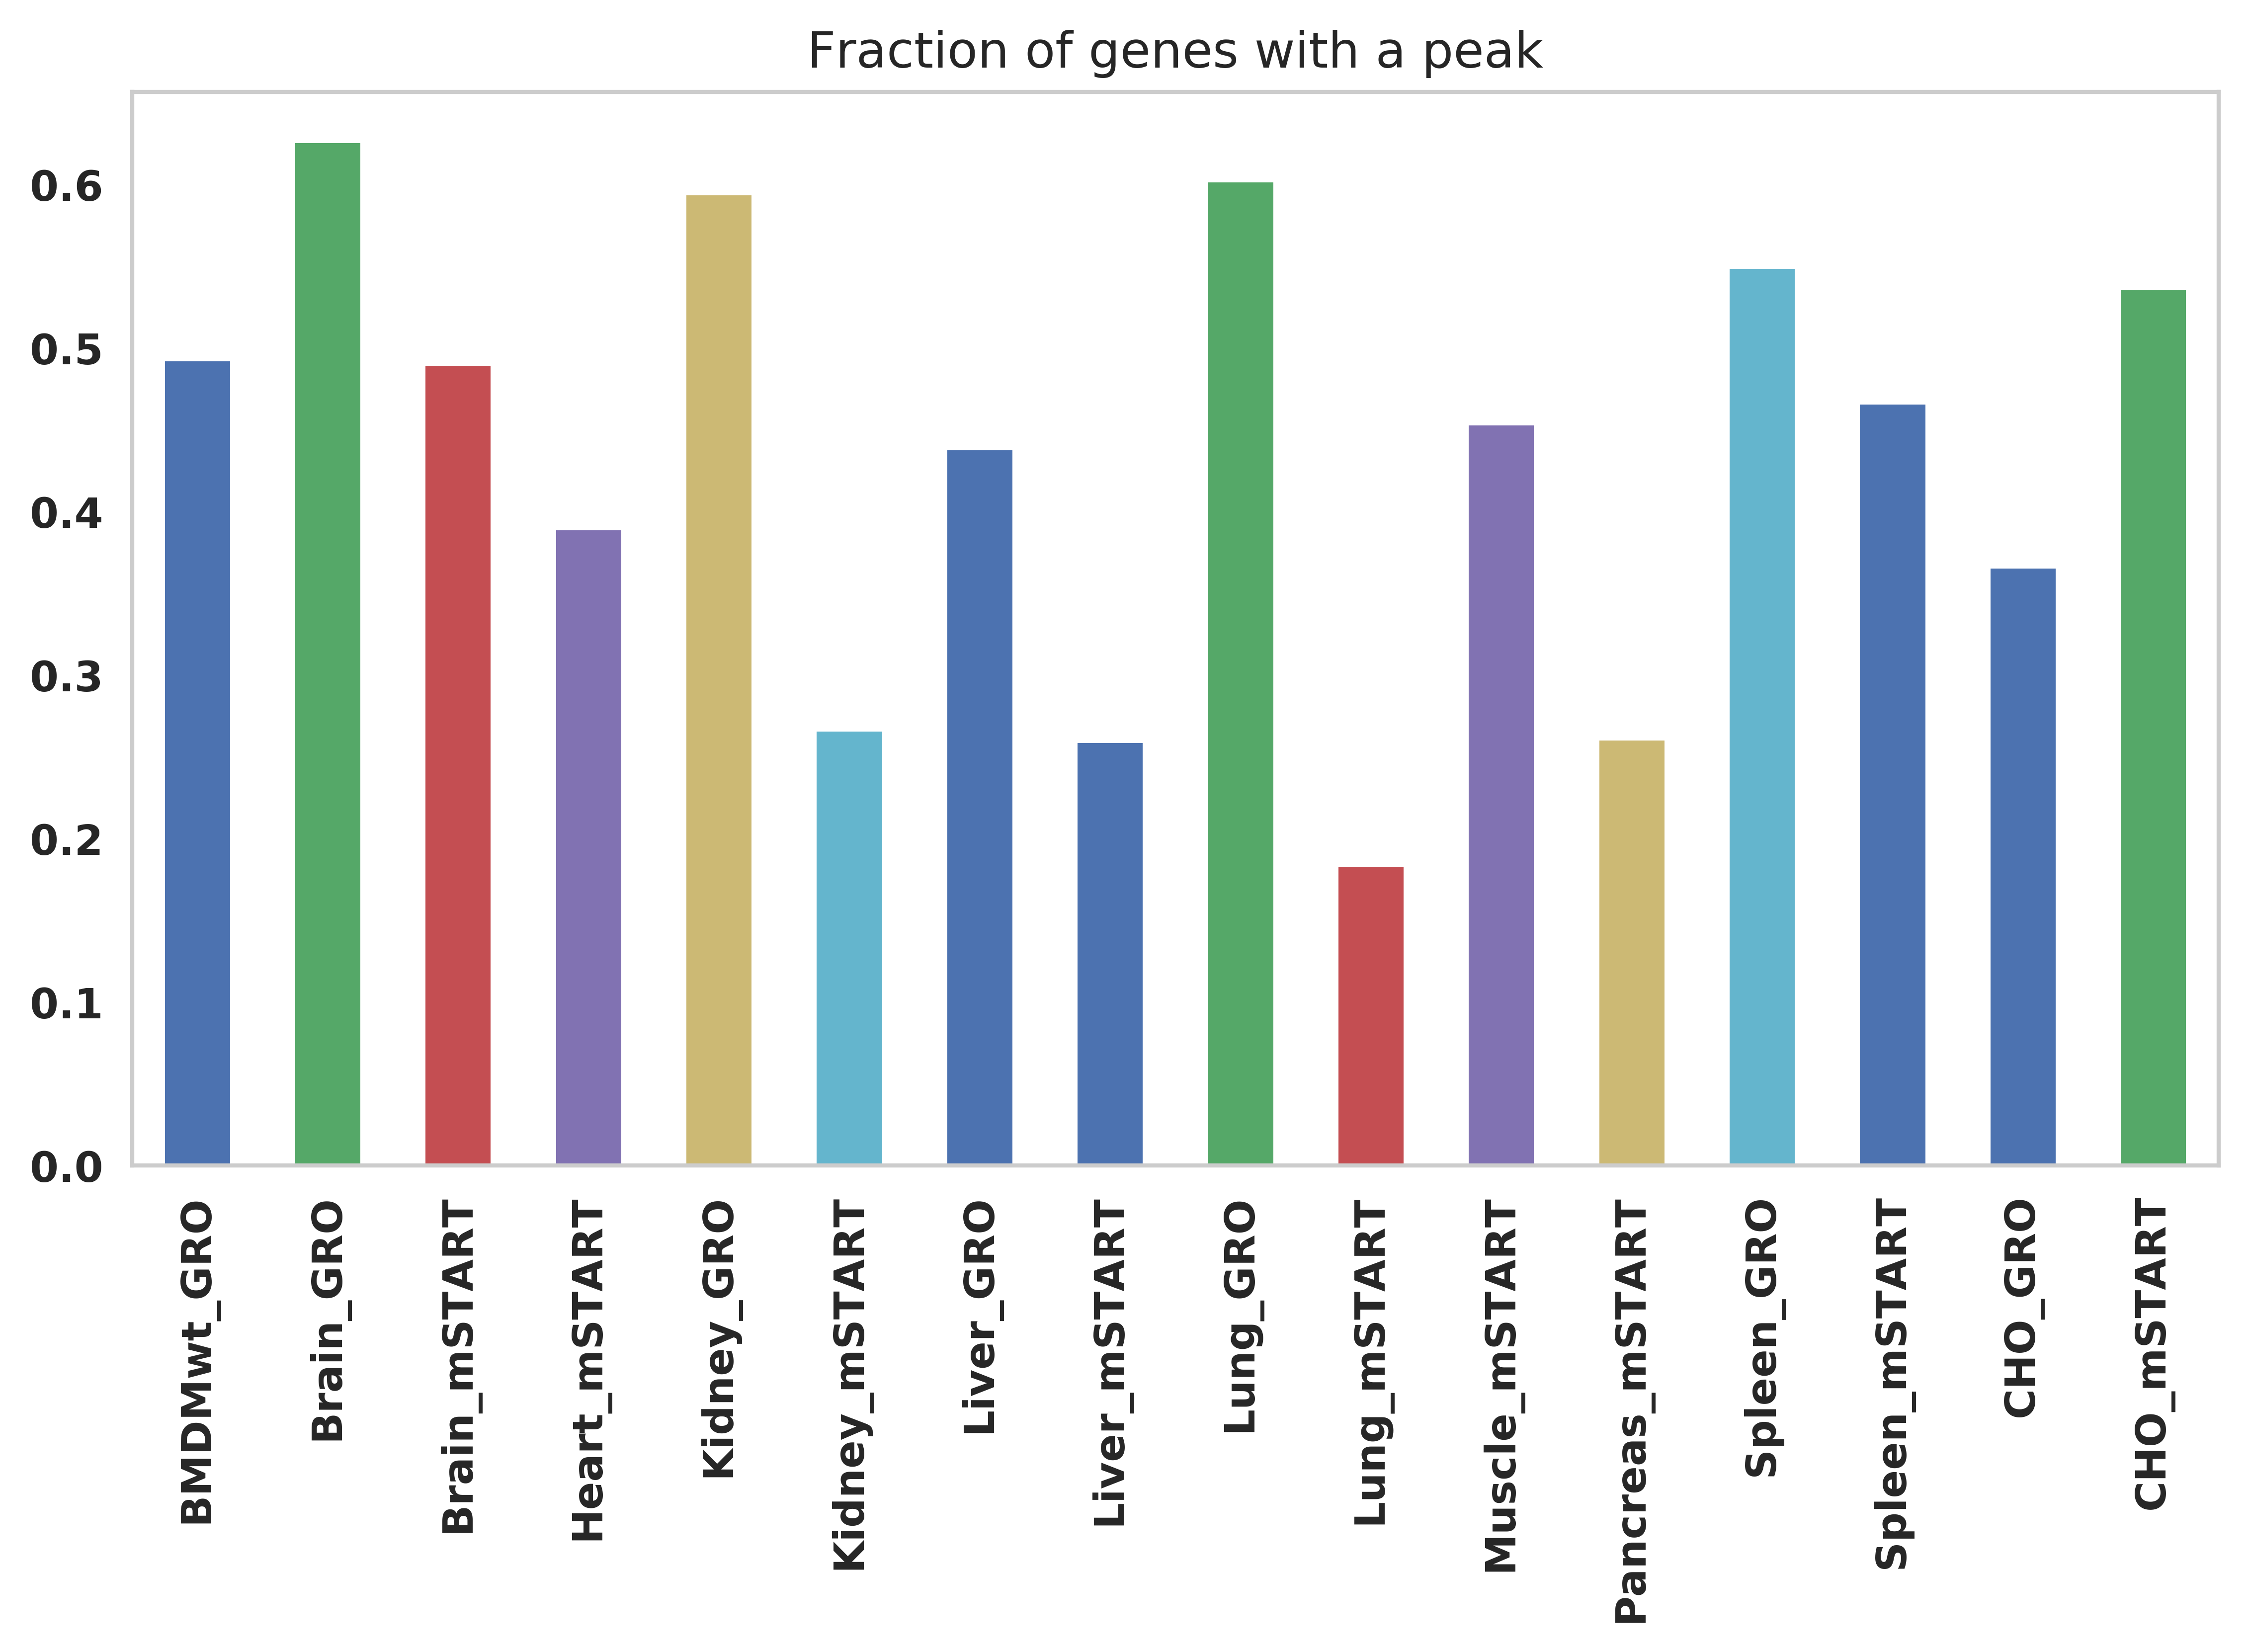

In [69]:
f = plt.figure(dpi=300)
ax = (np.sum((gene_tissue_matrix>0))/gene_df.shape[0]).plot.bar()
ax.set_title('Fraction of genes with a peak');
ax.set_xticklabels(meta_samples.loc[gene_tissue_matrix.columns,'Short']);
plt.tight_layout()
plt.savefig('Results/Figures/tissue_genes_1kb_1kb.pdf')

## Collapse experimental type 

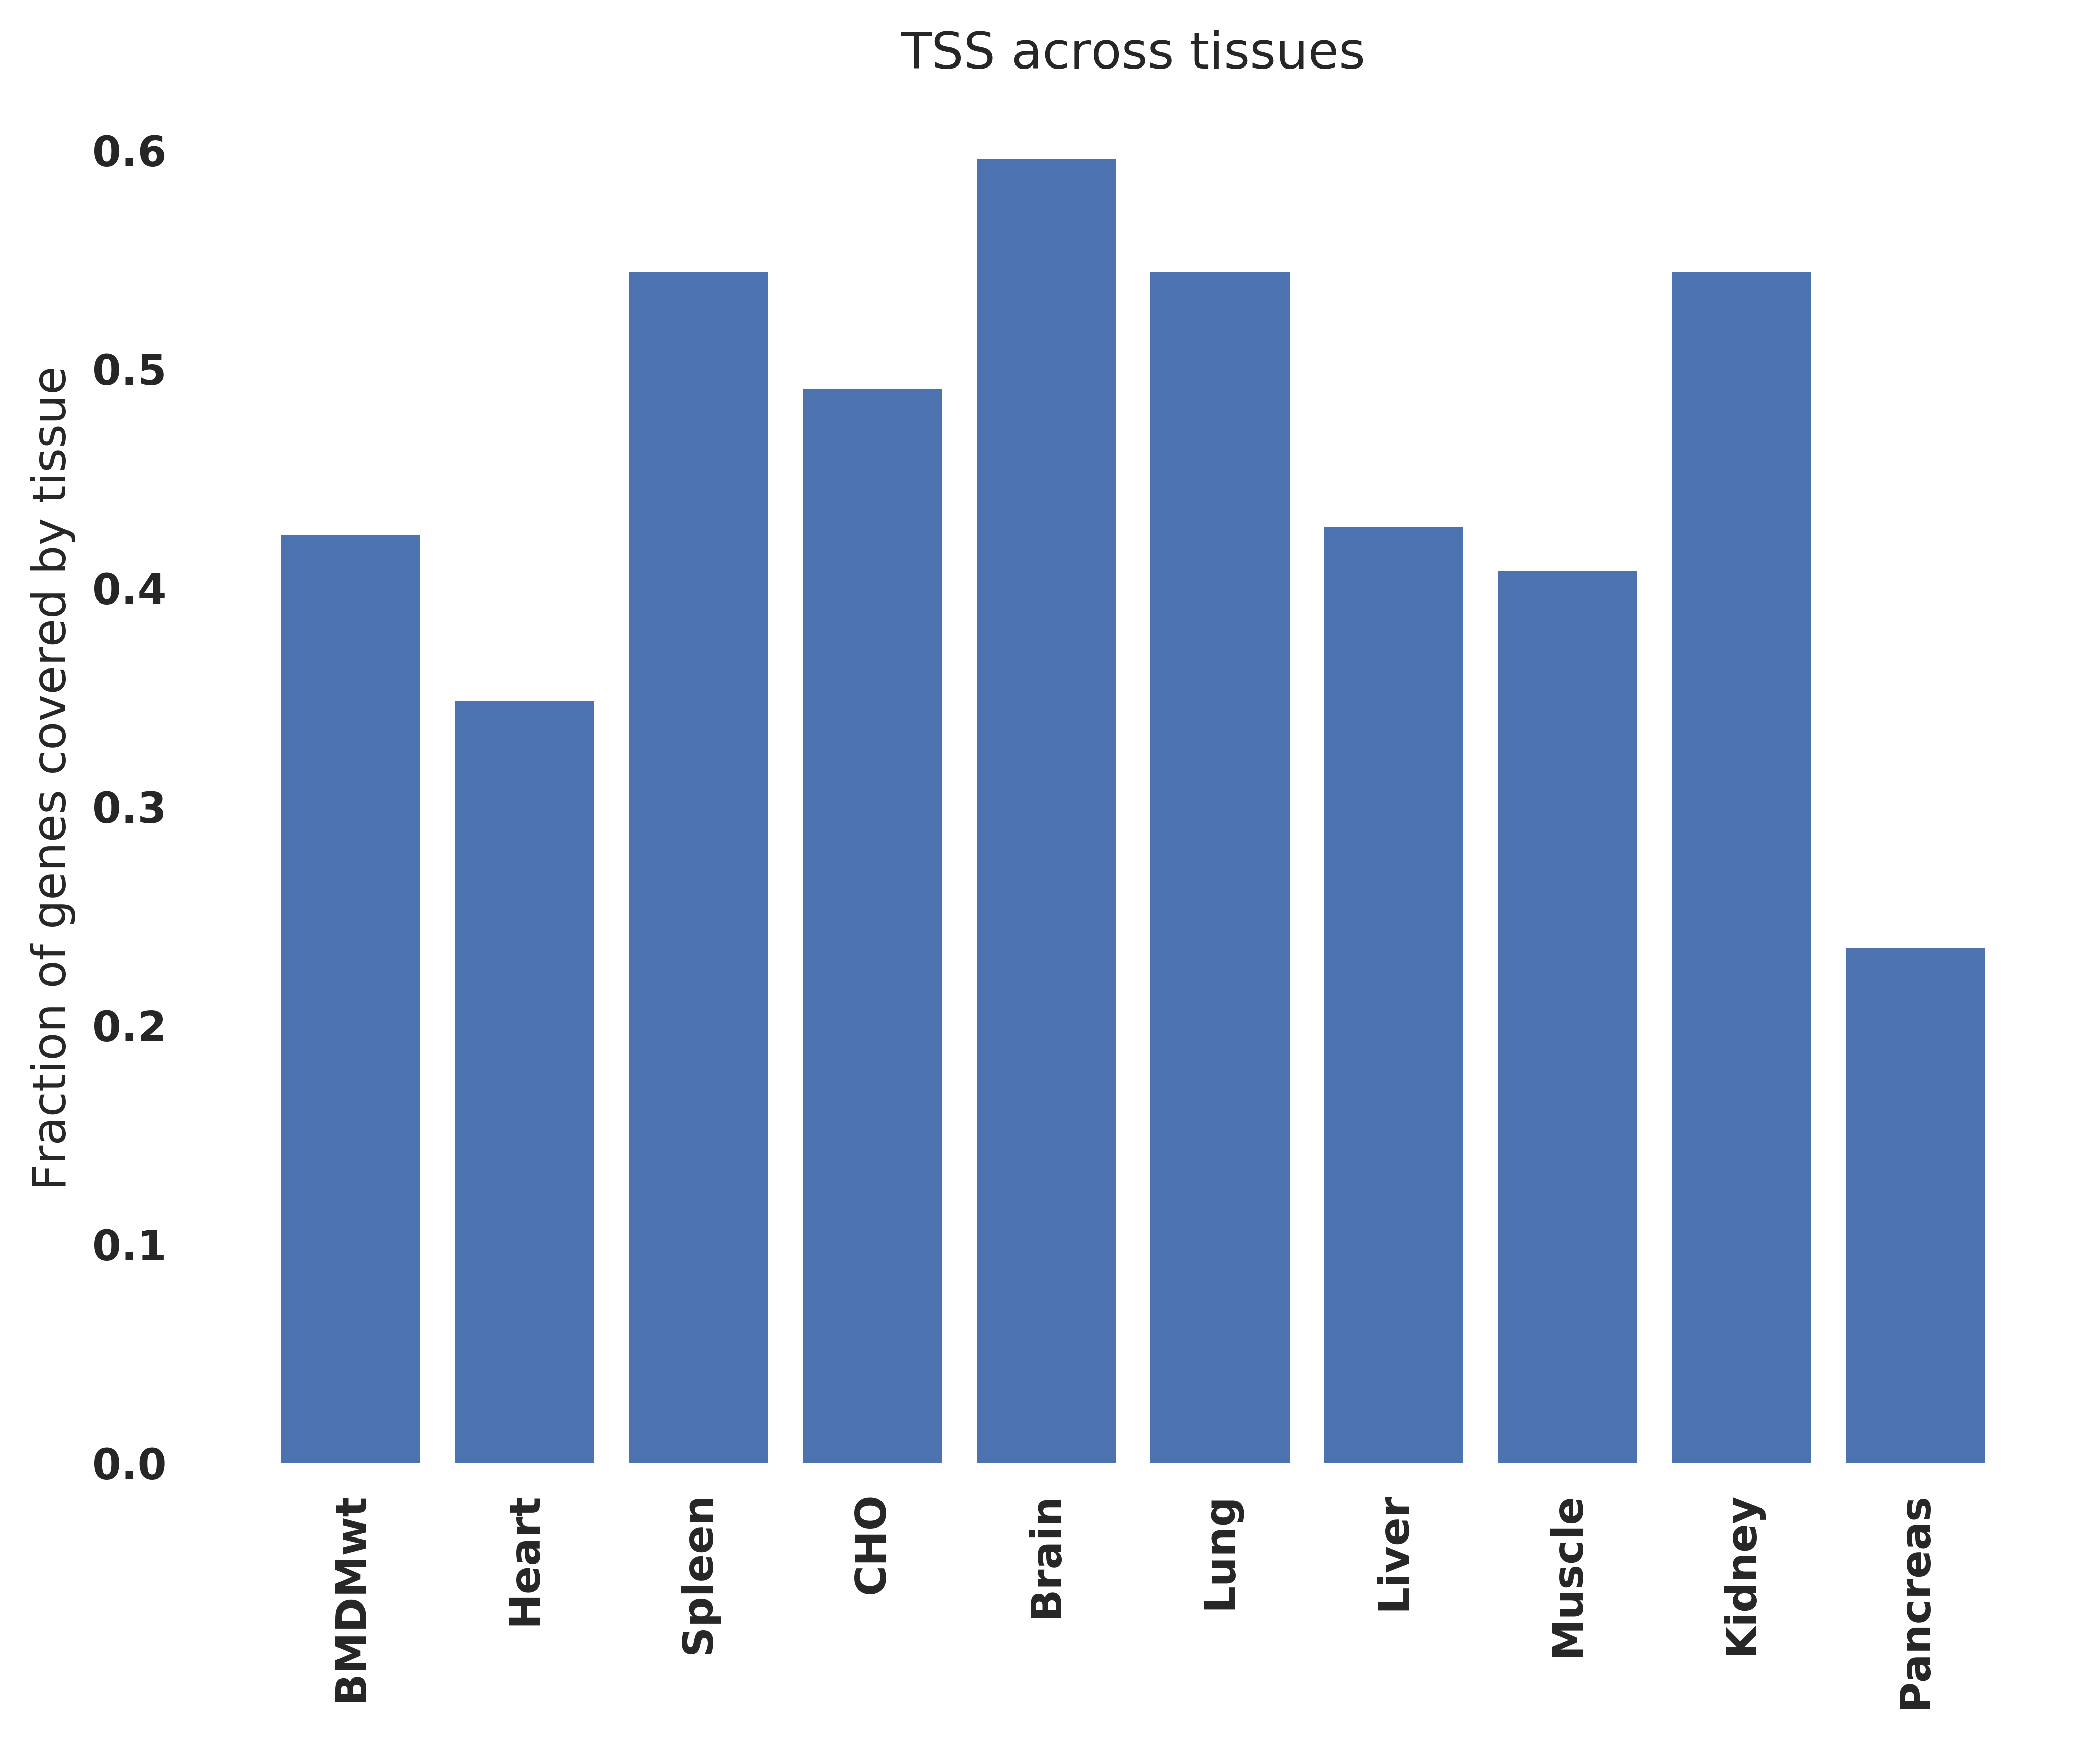

In [70]:
tissues_genes = dict()
for t in tissues:
    tissues_genes[t] = 0

for ind,val in gene_df.iterrows():
    curr_ts = set()
    for t in val['maxTissues']:
        curr_ts.add(t.split('_')[0])
    for t in curr_ts:
        tissues_genes[t] += 1
        if '1h' in t or 'KLA' in t:
            print(t)

no_peak = []
for t in tissues_genes:
    if tissues_genes[t] == 0:
        no_peak.append(t)

for t in no_peak:
    tissues_genes.pop(t,None)

    
#f = plt.figure(dpi=300)
f,ax = plt.subplots(dpi=300)
#f.patch.set_visible(False)


plt.bar(range(len(tissues_genes)), 1.0*np.array(tissues_genes.values())/(gene_df.shape[0]), align='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(range(len(tissues_genes)), list(tissues_genes.keys()),rotation=90);
plt.ylabel('Fraction of genes covered by tissue')
plt.title('TSS across tissues')

plt.savefig('Results/Figures/tissue_genes_collapsed_1kb_1kb.pdf')


# f = plt.figure(dpi=300)
# plt.bar(range(len(tissues_genes)), 1.0*np.array(tissues_genes.values())/(gene_df.shape[0]), align='center')
# plt.xticks(range(len(tissues_genes)), list(tissues_genes.keys()),rotation=90);
# plt.ylabel('Fraction of genes covered by tissue')
# plt.title('TSS across tissues')
# plt.savefig('Results/Figures/tissue_genes_collapsed_1kb_1kb.pdf')



In [71]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}


mpl.rc('font',**font)

In [87]:
np.sum(gene_df['hasGene'])

14020

In [88]:
np.sum(txn_df['hasGene'])

23164

In [89]:
gene_df.shape

(17246, 18)

In [90]:
1.0*np.sum(txn_df['hasGene'])/txn_df.shape[0]

0.4422129739223397

In [91]:
1.0*np.sum(gene_df['hasGene'])/gene_df.shape[0]

0.8129421315087556

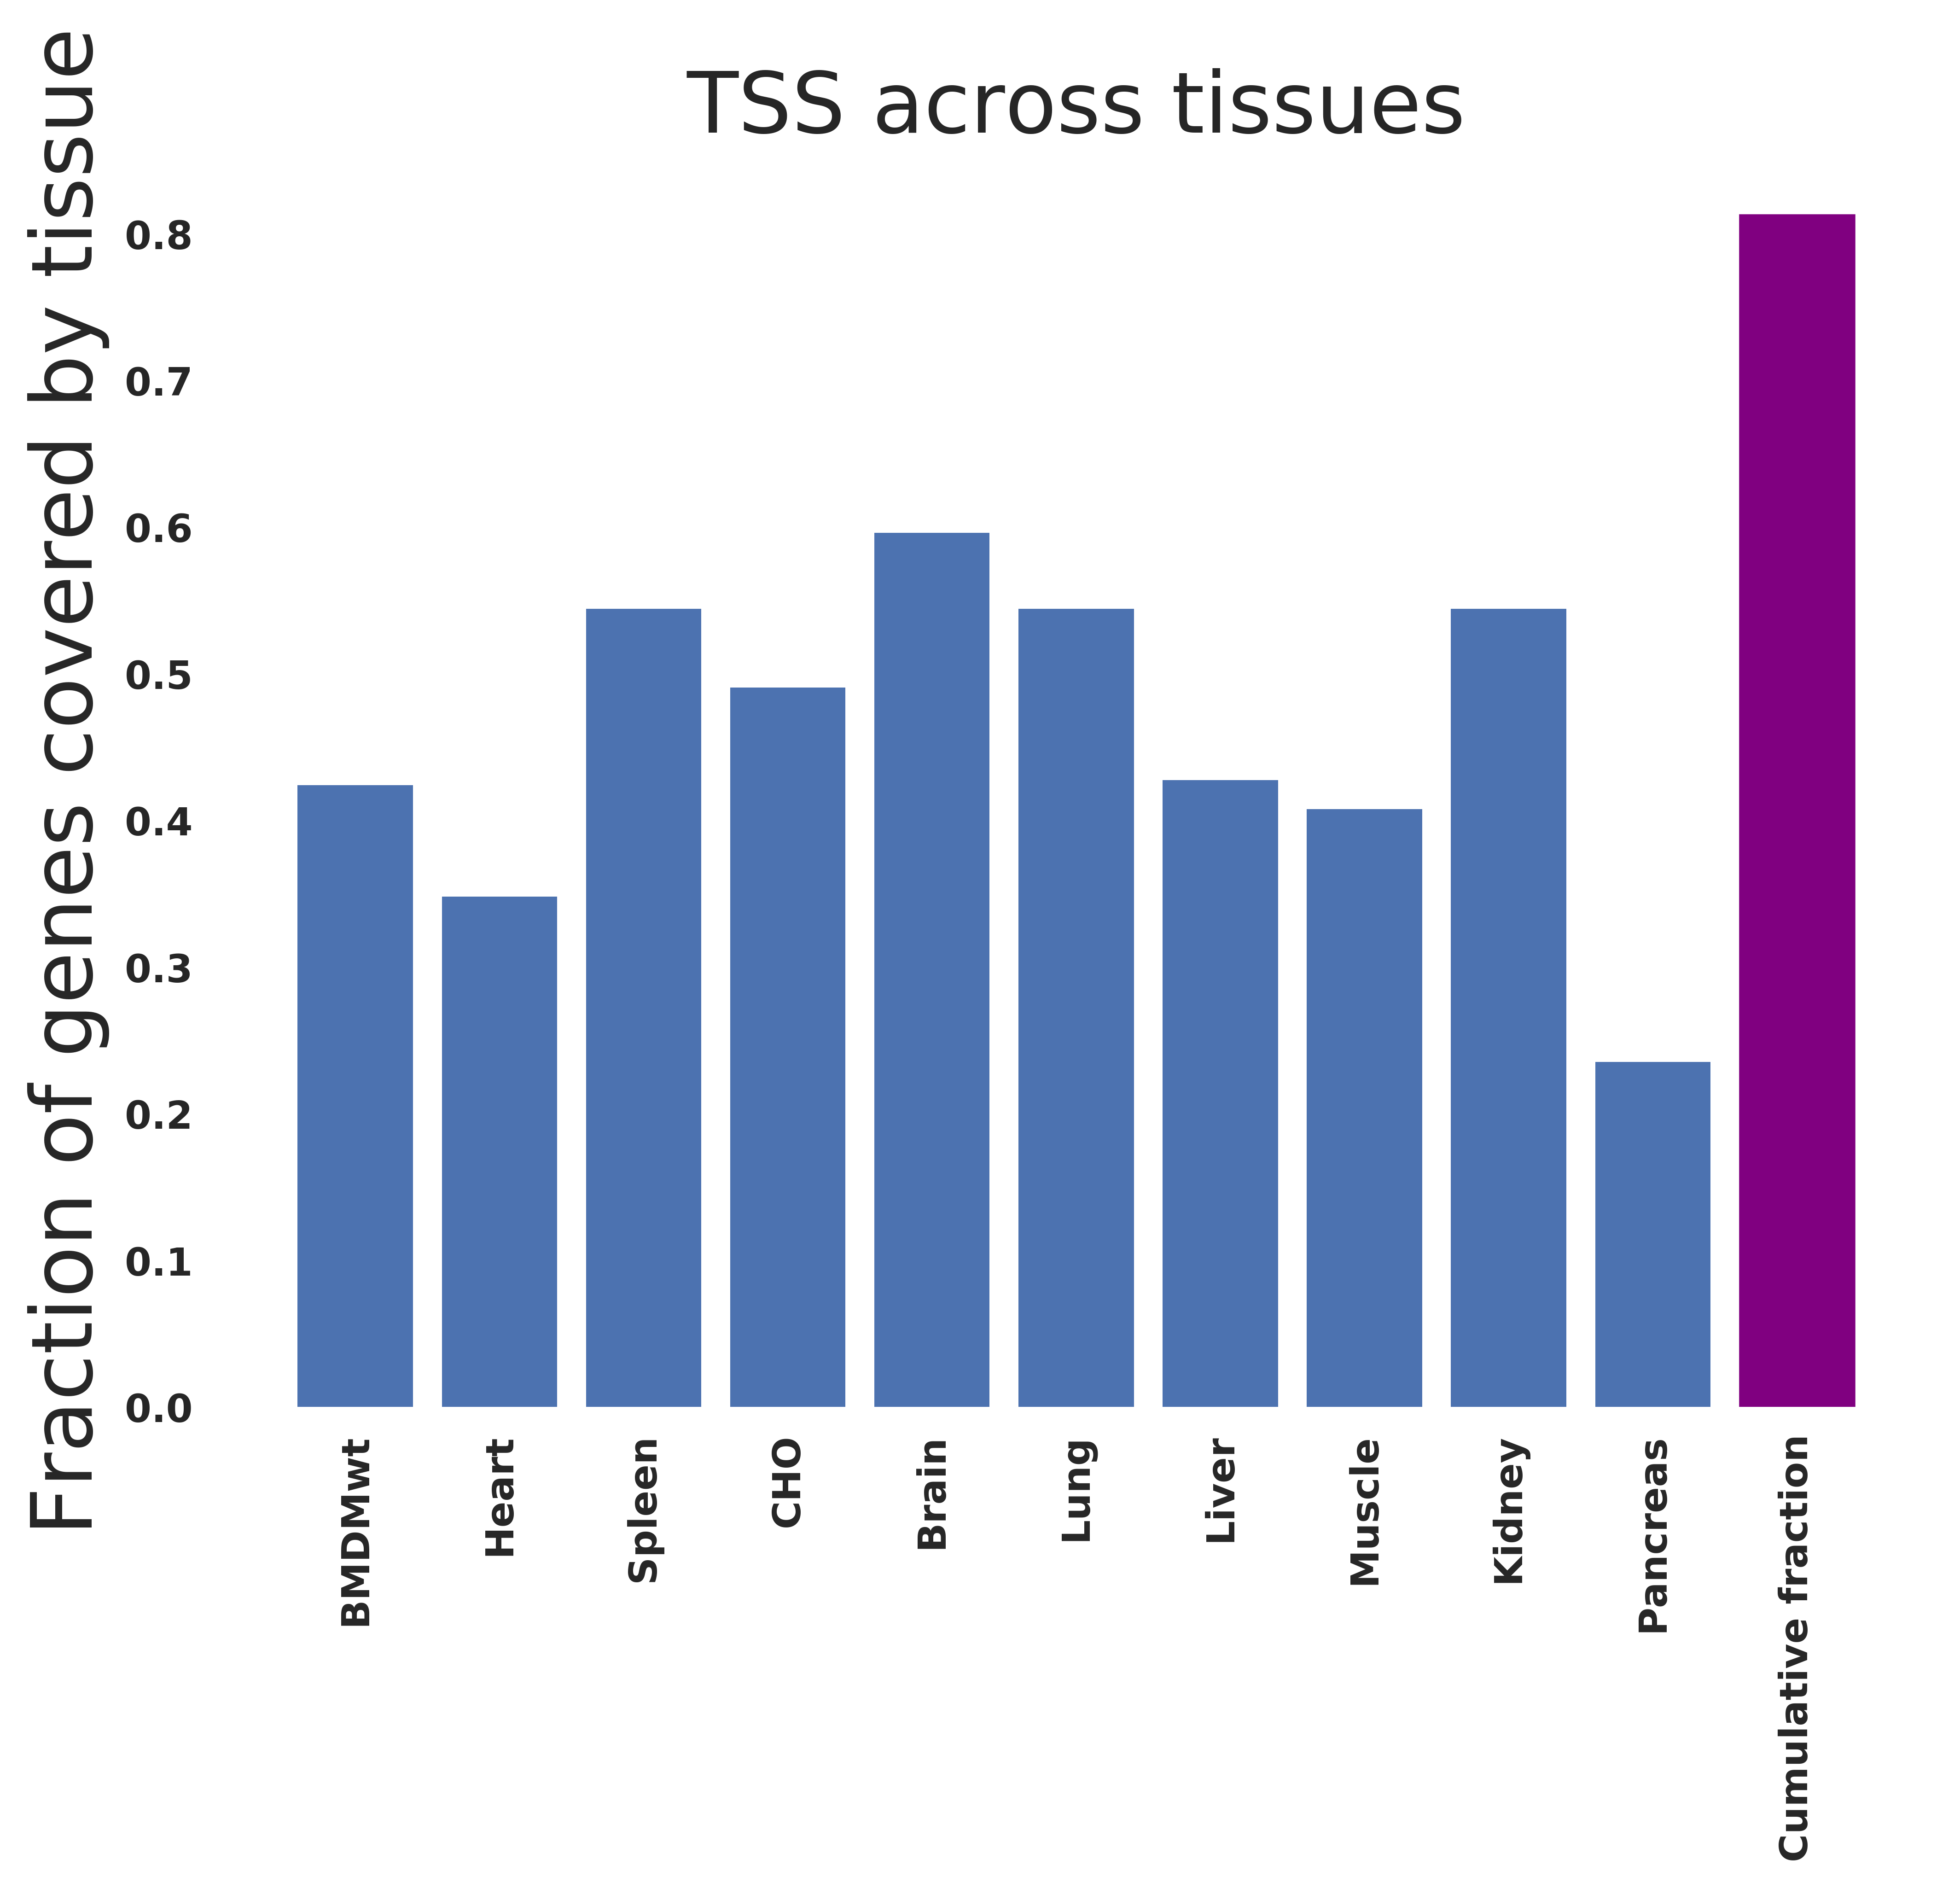

In [85]:

f,ax = plt.subplots(dpi=300)
#f.patch.set_visible(False)

#tissues_genes['Cumulative genes'] = 1.0*np.sum(gene_df['hasGene'])

x = range(len(tissues_genes)+1)
names = list(tissues_genes.keys()) #Add the total number of genes
names.append('Cumulative fraction')
y = 1.0*np.array(tissues_genes.values())/(gene_df.shape[0])
y = np.append(y,[1.0*np.sum(gene_df['hasGene'])/(gene_df.shape[0])])

#barlist = plt.bar(range(len(tissues_genes)), 1.0*np.array(tissues_genes.values())/(gene_df.shape[0]), align='center')
barlist = plt.bar(x, y, align='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
barlist[-1].set_color('purple')
plt.xticks(range(len(tissues_genes)+1), names,rotation=90);
plt.ylabel('Fraction of genes covered by tissue',{'fontsize': 22})
plt.title('TSS across tissues',{'fontsize': 22})

plt.savefig('Results/Figures/tissue_genes_collapsed_1kb_1kb.pdf',dpi=300,bbox_inches='tight')



### Tissue Distribution

/home/isshamie/software/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


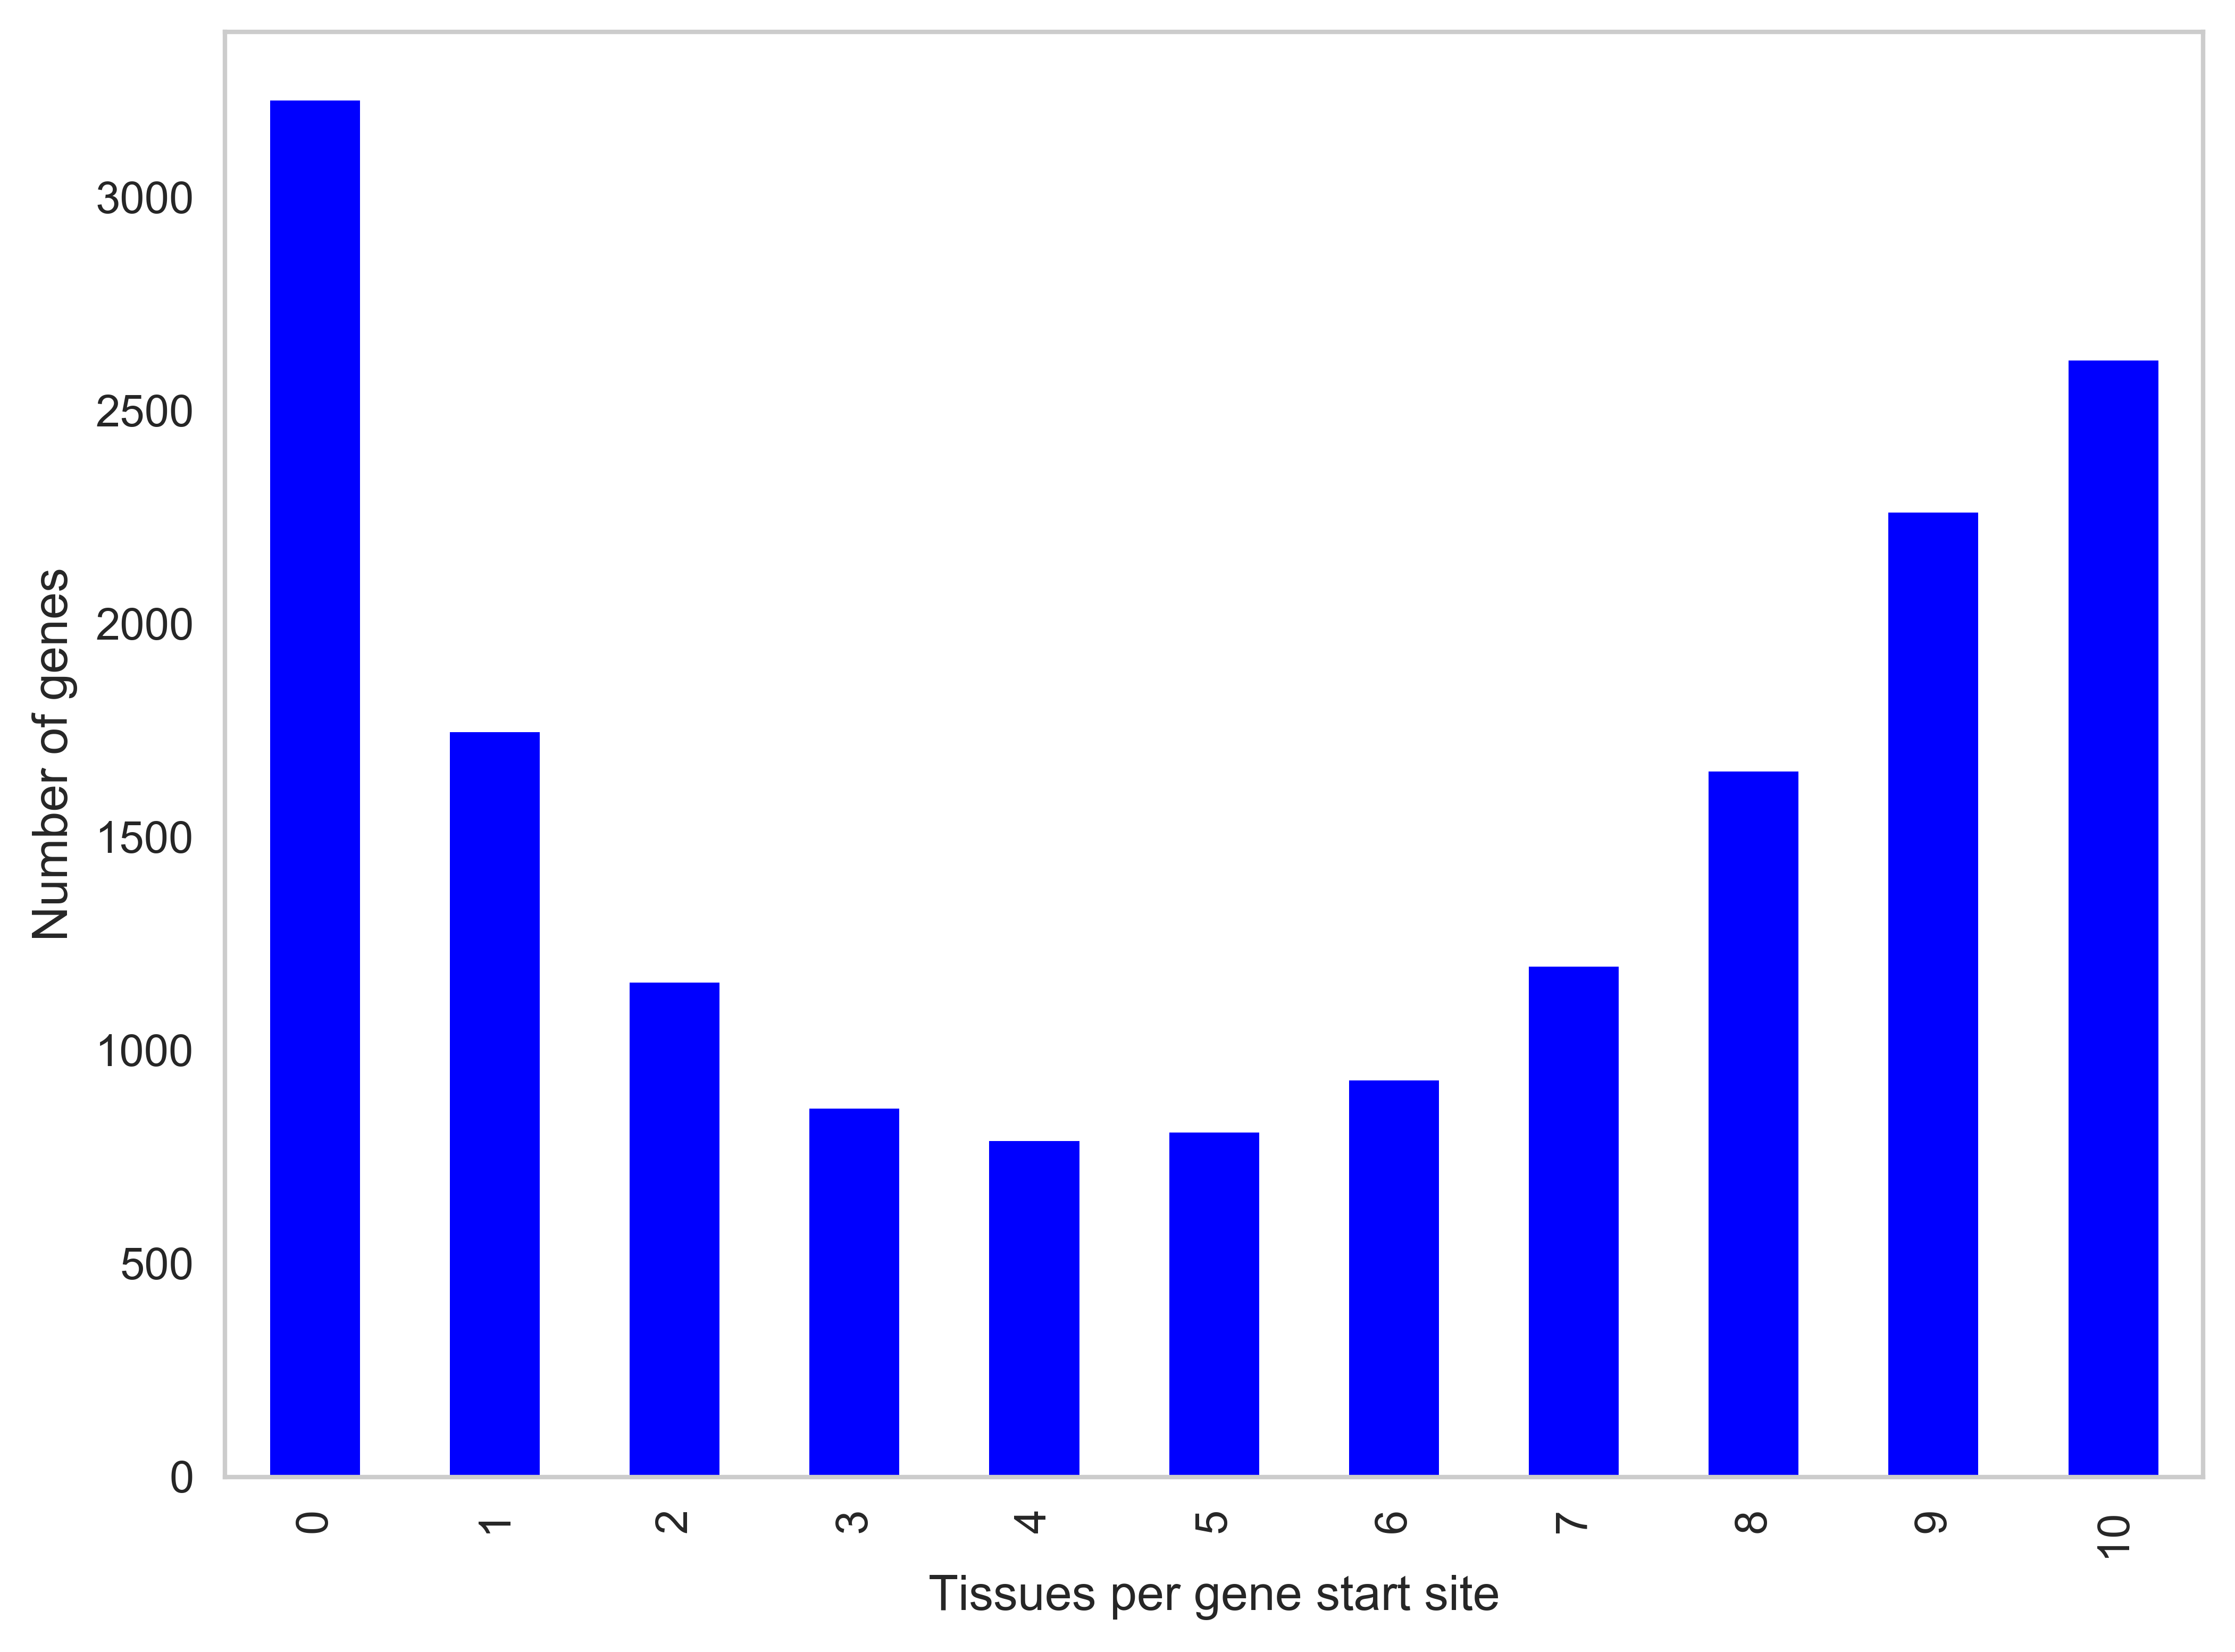

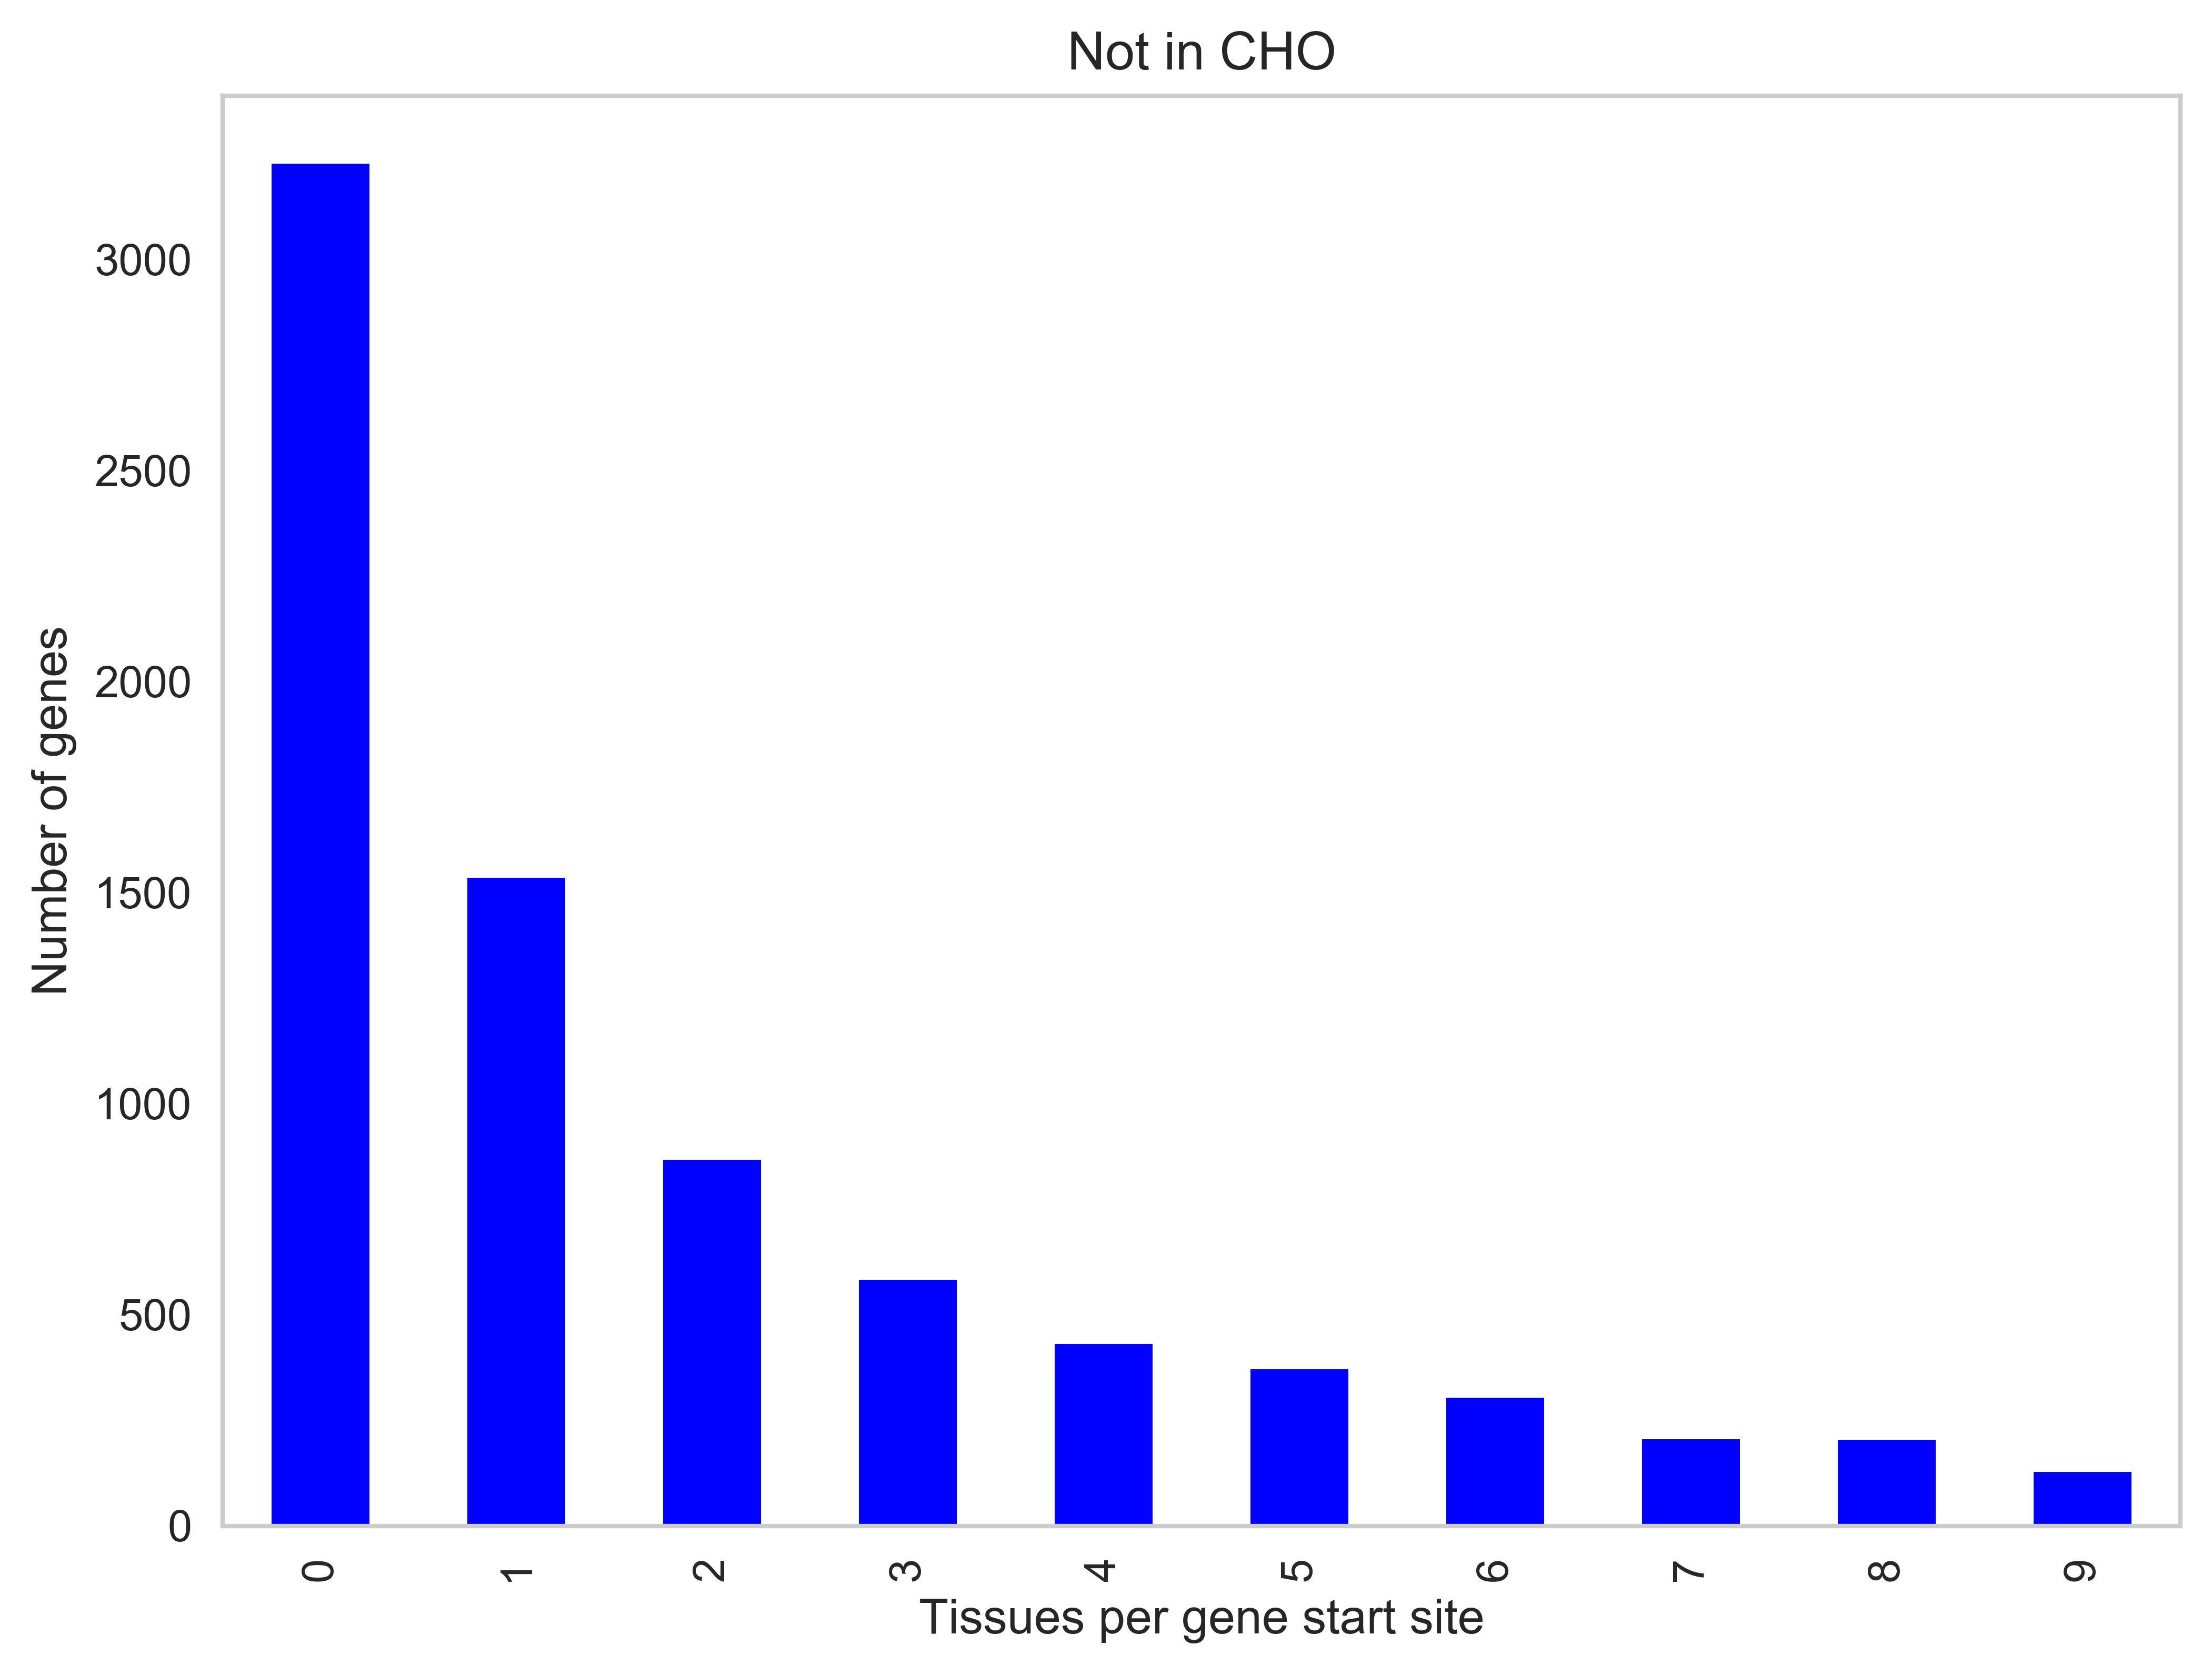

In [18]:
not_in_cho = []
in_cho = []
all_t = []
for g in gene_df['tissues']:
    curr = [i.split('_')[0] for i in g ]
    curr = np.unique(np.array(curr))
    if 'CHO' in curr:
        in_cho.append(len(curr))
    else:
        not_in_cho.append(len(curr))
    all_t.append(len(curr))

f = plt.figure(dpi=300)
pd.Series(Counter(all_t)).plot.bar(color='b')
plt.xlabel('Tissues per gene start site')
plt.ylabel('Number of genes')
plt.savefig('Results/Figures/num_tissues_1kb_1kb.pdf',bbox_inches='tight')

f = plt.figure(dpi=300)
pd.Series(Counter(not_in_cho)).plot.bar(color='b')
plt.xlabel('Tissues per gene start site')
plt.title('Not in CHO')
plt.ylabel('Number of genes')
plt.savefig('Results/Figures/num_tissues_not_in_cho_1kb_1kb.pdf',bbox_inches='tight')

## Venn Diagram CHO and not CHO

## Values for each peak

In [19]:
tss_1kb_1kb = pd.read_csv('/data/isshamie/TSS/Analysis/Results/tss_final/tss_peakCenter_1kb_1kb.bed',sep='\t',header=None)

In [20]:
tss_1kb_1kb.head()

0      1      2                                                  3  \
0  picr_0  45849  45999                      RRP7A;gene_2;asmbl_4;CHO;cs=1   
1  picr_0  44409  44566        RRP7A;gene_2;asmbl_10;Brain,CHO,Spleen;cs=1   
2  picr_0  20879  21067  SERHL;gene_1_4;asmbl_14;BMDMwt,Heart,Spleen,CH...   
3  picr_0  98719  98916  POLDIP3;gene_3_1;asmbl_17;BMDMwt,Heart,Spleen,...   
4  picr_0  78177  78416  POLDIP3;gene_3_1;asmbl_19;BMDMwt,Heart,Spleen,...   

            4  5  
0    3.040000  -  
1   10.105000  -  
2   96.550003  +  
3  146.399994  -  
4   34.799999  -

In [21]:
tss_1kb_1kb[4].describe()

count     23163.000000
mean         80.186711
std        1274.277191
min           0.299000
25%           4.240000
50%          14.100000
75%          45.050001
max      178150.062500
Name: 4, dtype: float64

Text(0,0.5,u'Frequency')

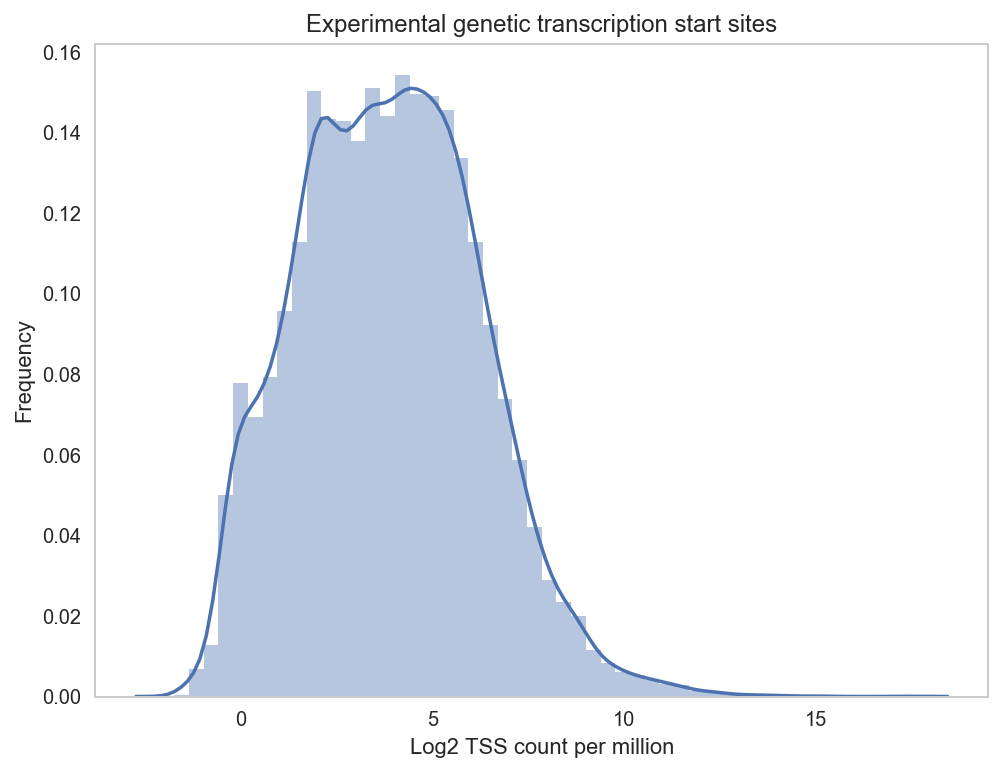

In [22]:
sns.distplot(np.log2(tss_1kb_1kb[4]))
plt.title('Experimental genetic transcription start sites')
plt.xlabel('Log2 TSS count per million')
plt.ylabel('Frequency')

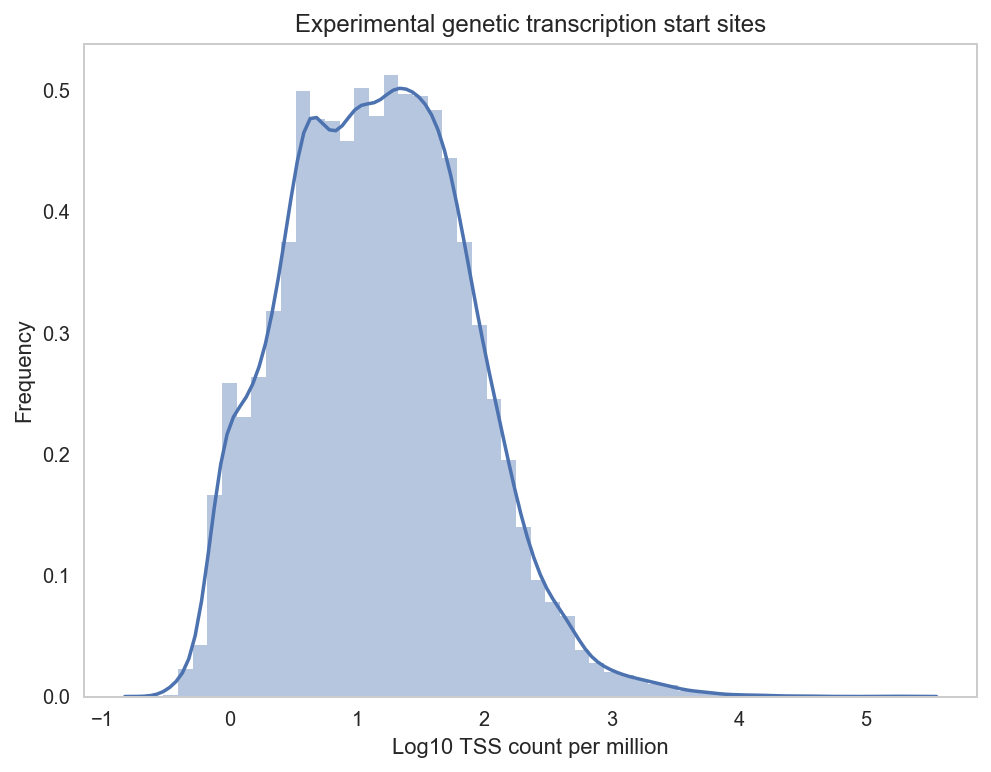

In [23]:
sns.distplot(np.log10(tss_1kb_1kb[4]))
plt.title('Experimental genetic transcription start sites')
plt.xlabel('Log10 TSS count per million')
plt.ylabel('Frequency')
plt.savefig('Results/Figures/log10_CPM_promoter_1kb_1kb.pdf')